Note: Due to some constraint on computation memory, some of the code encountered "kernel died" when they were run again, so some of the plots didn't show up. The latter half of the code ran with only a few cells at a time and then with kernel restarted. <br> This time, try every 20 slices as one interval $[tried; still \space messy]$ <br> Try 50 slices as an interval $[emmm, somehow \space better, but \space still \space not \space neat]$

P.S.: the "vmax" in MI plots are set up for visual purposes; check its statistics for accurate info

path: 

/xdisk/chanc/share/

there are two folders: GRMHD_dt1000M and GRMHD_dt10M

under GRMHD_dt1000M: Ma+0.5_w5  Ma+0.94_w5  Ma-0.5_w5  Ma-0.94_w5  Ma0_w5  Sa+0.5_w5  Sa+0.94_w5  Sa-0.5_w5  Sa-0.94_w5  Sa0_w5

under GRMHD_dt10M: Ma+0.94_w5  Ma-0.94_w5  Sa+0.94_w5, 5000 - 5999

### electron temperature:

eqn 27 of https://arxiv.org/pdf/2202.11721.pdf: $Te = \frac{m_{p}u(\gamma_{e}-1)(\gamma_{i}-1)}{k \rho (y(\gamma_{i}-1)+Rz(\gamma_{e}-1))}$ where: <br> y and z are the number of electrons and nucleons per unionized atom, respectively <br> eqn 22 $R = \frac{R_{low}}{1+\widetilde{\beta}^{2}}+ \frac{R_{high}\widetilde{\beta}^{2}}{1+\widetilde{\beta}^{2}}$ and $\widetilde{\beta} = \frac{\beta}{\beta_{crit}}$, assume $\beta_{crit}=1$. Try $R_{high}=1, 10, 40, 160$; $R_{low}=1$ <br> 

look for γ: https://arxiv.org/pdf/2202.11721.pdf <br> Assume ideal gas -> $Γ = \frac{5}{3} + \frac{4}{3}(1 - x_{e})$ where $x_{e}$ is the electron fraction. <br> $\gamma = \frac{4}{3}$, $x_{e} = \frac{1}{4}$, so ions:electrons = 3:1 (y=1, z=3; $\gamma_{i}=\gamma=\frac{4}{3}, \gamma_e = \gamma + x_{e} / (1 - x_{e})(5/3 - \gamma) = \frac{7}{3}$) <br> $\gamma = \frac{13}{9}$, $x_{e} = \frac{1}{3}$, so ions:electrons = 2:1 (y=1, z=2; $\gamma_{i}=\gamma=\frac{13}{9}, \gamma_e = \gamma + x_{e} / (1 - x_{e})(5/3 - \gamma) = \frac{133}{36}$) <br> $\gamma = \gamma_{i}=\frac{5}{3}$, so the gas is fully composed of ions (i.e. $\gamma_{e} = 0$) (? y=z=1; $\gamma_{i}=\gamma_{e} = \gamma = \frac{5}{3}$) <br>

For non-uniform $\gamma$: https://www.aanda.org/articles/aa/full_html/2015/08/aa26247-15/aa26247-15.html

We assume uniform $\gamma$ in the following simulations. <br>

Variance plot $(Te - <Te>)^{2}|_{calculated}$

In [1]:
import warnings

from toolz import valmap

import h5py
import pyharm

from matplotlib   import pyplot as plt
import numpy as np
from pyharm.plots import plot_dumps as pplt

In [2]:
print(pyharm.units)

<module 'pyharm.units' from '/home/u12/limengjiang/.local/lib/python3.8/site-packages/pyharm/units.py'>


In [3]:
pyharm.units.get_cgs()

{'CL': 29979245800.0,
 'QE': 4.8032068e-10,
 'EE': 4.8032068e-10,
 'ME': 9.1093826e-28,
 'MP': 1.67262171e-24,
 'MN': 1.67492728e-24,
 'HPL': 6.6260693e-27,
 'HBAR': 1.0545717e-27,
 'KBOL': 1.3806505e-16,
 'GNEWT': 6.6742e-08,
 'SIG': 5.6704e-05,
 'AR': 7.5657e-15,
 'THOMSON': 6.65245873e-25,
 'JY': 1e-23,
 'PC': 3.085678e+18,
 'AU': 14959787069100.0,
 'MSOLAR': 1.989e+33,
 'RSOLAR': 69600000000.0,
 'LSOLAR': 3.827e+33}

In [4]:
i0 = 5010 # initial  frame
i1 = 5051 # 1 + last frame

fmt = 'torus.out0.{:05d}.h5'

qualities = ['RHO', 'Pg', 'bsq', 'beta', 'Theta', 'Thetae']

In [5]:
def fname(i, src): # closure on `src` and `fmt`
    return (src+fmt).format(i)

In [6]:
w = (-20,20,-20,20)
# are m and mm decided after a few attempts? yes
def mkplots(k, m, mm):
    # edge-on for xz
    fig, axes = plt.subplots(1,4, figsize=(16,4))
    pplt.plot_xz(axes[0], dump0,      k, window=w, vmin=0, vmax=m)
    pplt.plot_xz(axes[1], dump1,      k, window=w, vmin=0, vmax=m)
    pplt.plot_xz(axes[2], dump, 'avg'+k, window=w, vmin=0, vmax=m)
    pplt.plot_xz(axes[3], dump, 'var'+k, window=w, vmin=0, vmax=mm)

In [7]:
def mkplots_td(k, m, mm):
    # top-down for xy
    fig, axes = plt.subplots(1,4, figsize=(16,4))
    pplt.plot_xy(axes[0], dump0,      k, window=w2, vmin=0, vmax=m)
    pplt.plot_xy(axes[1], dump1,      k, window=w2, vmin=0, vmax=m)
    pplt.plot_xy(axes[2], dump, 'avg'+k, window=w2, vmin=0., vmax=m)
    pplt.plot_xy(axes[3], dump, 'var'+k, window=w2, vmin=0., vmax=mm)

## Electron Temperature Variance Plot(s)

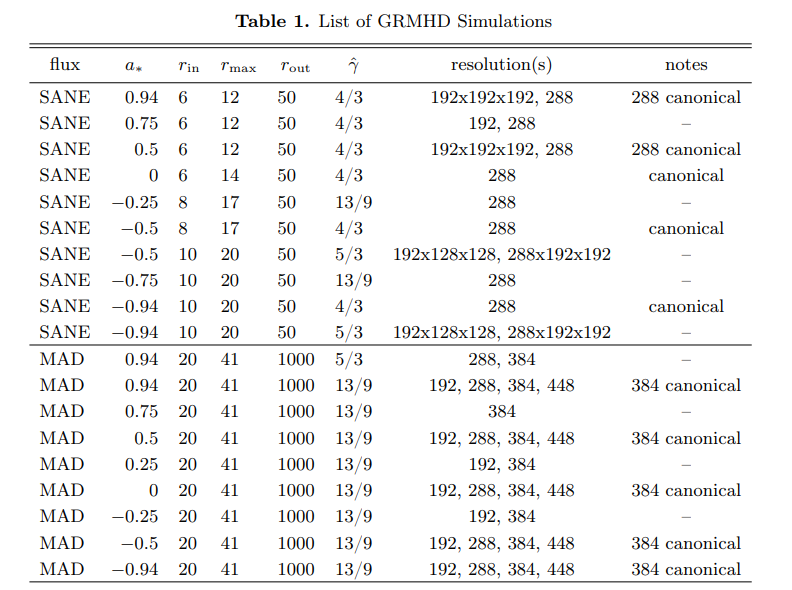

? $r_{max}$: the mkplot vmax value

### The! Units! In! GRMHD! Simulation! 

https://tok.fandom.com/wiki/Lorentz%E2%80%93Heaviside_units

https://academic.oup.com/mnras/article/454/2/1848/2892599

In [8]:
# some constants
cl = 29979245800.0 # speed of light in cgs
mp = 1.67262171e-24
kb = 1.3806505e-16

In [9]:
# R
def R(dump, Rh, Rl):
    # with warnings.catch_warnings(record=True) as w:
    '''
    try: 
        beta = dump['beta']
    except RuntimeWarning as warning:
        if str(warning) == "divide by zero encountered in true_divide":
            beta = np.zeros(dump['Pg'])
    '''
    beta = dump['beta']
    return Rl/(1+beta**2)+Rh*beta**2/(1+beta**2)

In [10]:
# electron temperature
def Te(dump, Rh, Rl, gamma):
    if gamma == 4/3:
        y = 1
        z = 3
        gamma_i = 4/3
        gamma_e = 7/3
    if gamma == 13/9:
        y = 1
        z = 2
        gamma_i = 13/9
        gamma_e = 133/36
    if gamma == 5/3:
        y = 1
        z = 1
        gamma_i = 5/3
        gamma_e = 5/3
    beta = dump['beta']
    u = dump['Pg']/(gamma-1)
    r = R(dump, Rh, Rl)
    numerator = mp*cl**2*u*(gamma_e-1)*(gamma_i-1)
    denom = kb*dump['RHO']*(y*(gamma_i-1)+r*z*(gamma_e-1))
    '''
    try:
        electron_T = numerator/ denom
    except RuntimeWarning as warning:
        if str(warning) == "invalid value encountered in true_divide":
            electron_T = np.full(numerator.shape, 10**10)
    '''
    electron_T = numerator/ denom
    dump.cache['Te'] = electron_T
    return electron_T

In [11]:
src_ma_10M = '/xdisk/chanc/share/GRMHD_dt10M/Ma+0.94_w5/'
src_sa_10M = '/xdisk/chanc/share/GRMHD_dt10M/Sa+0.94_w5/'

src_ma_1000M = '/xdisk/chanc/share/GRMHD_dt1000M/Ma+0.94_w5/'
src_sa_1000M = '/xdisk/chanc/share/GRMHD_dt1000M/Sa+0.94_w5/'

dump0 = pyharm.load_dump(fname(i0, src_ma_10M))
R_low = 1.
R_high = [1, 10, 40, 160]
# first row of SANE model params

In [12]:
def get_dumps(i0, i1, src, step=1):
    dumps = {}
    for i in range(i0, i1, step):
        dumps[str(i)] = pyharm.load_dump(fname(i, src))
    return dumps

In [13]:
def average(irange, keys, dumps):
    s = {k:0 for k in keys}
    for i in irange:
        # print('i:', i)
        # Because data I/O is expensive, we load the data once ...
        d = dumps[str(i)].cache
        # print('d:', d)
        # ... and then sum over multiple keys
        for k in keys:
            s[k] += d[k] # i.e.: s[key1] = file1[key1] + file2[key1] + file3[key1] + ...
            # print('s[k]:', s[k])
            # print('d[k]', d[k])
    print('finish average calculation.')
    return valmap(lambda v: v/len(irange), s) # return an average of variables from the files read in

In [14]:
# works; returns an array of arrays with numerical values
def variance(irange, dumps, quality='Te'):
    """
    quality: str, the physical quality whose variance values we want (e.g. 'Te' for electron temperature)
    dumps: dictionary, all the dump files read in
    """
    key = 'var' + quality
    ss = {key: np.zeros_like(dump0['Pg'])}
    for i in irange:
        d = dumps[str(i)].cache
        ss[key] += (d[quality]-d['avg' + quality])**2
    print('finish variance calculation\'s loop')
    return valmap(lambda v: v/len(irange), ss)

In [15]:
def change_Rh(i0, i1, src, idx, gamma=4/3):
    """
    src: str, path to the folder
    idx: int, corresponds to the index of the R_high list
    """
    dumps = get_dumps(i0, i1, src)
    Te_rh = {} 
    dict_keys = dumps.keys()
    for key in dict_keys:
        temp = Te(dumps[key], R_high[idx], R_low, gamma)
        Te_rh[key] = temp
    dump0 = pyharm.load_dump(fname(i0, src))
    print('finish reading in dumps')
    Te_avg = average(range(i0, i1), ['Te'], dumps)
    for dump in dumps.values():
        dump.cache['avgTe'] = np.squeeze(np.array(list(Te_avg.values())))
    Te_var = variance(range(i0, i1), dumps)
    for dump in dumps.values():
        dump.cache['varTe'] = np.squeeze(np.array(list(Te_var.values())))
    return dumps

In [16]:
def MI(dumps, i0, quality='Te'):
    avg = 'avg' + quality
    var = 'var' + quality
    dumps[str(i0)].cache['MI('+ quality +')'] = np.sqrt(dumps[str(i0)].cache[var])/dumps[str(i0)].cache[avg]

In [17]:
def get_statistics(dumps, quality):
    """
    dumps: the dumps' dictionary in the format of dumps={'5010':arr1, '5011':arr2, etc}
    quality: string, the quality whose statistics we want 
    """
    print('statistics on ' + quality + ':')
    print('max ' + quality + ':')
    maximum = np.max(dumps[str(i0)].cache[quality])
    print("{:e}".format(maximum))
    print('percentile on ' + quality+ ' [50%, 75%, 90%]:')
    # percentile of the flattened grid
    percentile = np.percentile(dumps[str(i0)].cache[quality], [50, 75, 90])
    print(percentile)

# $\gamma = \frac{4}{3}$

In [18]:
# try gamma = 4/3
# ahhhh unit conversion
# T_sa1 = Te(dump0, R_high[3], R_low, 4/3, 5000) 
# print(T_sa1)
# 10^4 K - 10^7K

In [18]:
# electron temperature, mad model, R_high = 1
dumps = get_dumps(i0, i1, src_ma_10M)
Te_mad_rh1 = {} 
dict_keys = dumps.keys()
for key in dict_keys:
    Te_ma = Te(dumps[key], R_high[0], R_low, 4/3)
    Te_mad_rh1[key] = Te_ma

In [28]:
dump0 = pyharm.load_dump(fname(i0, src_ma_10M))

In [29]:
# average
Te_Ma_avg1 = average(range(i0, i1), ['Te'], dumps)
for dump in dumps.values():
    dump.cache['avgTe'] = np.squeeze(np.array(list(Te_Ma_avg1.values())))

i: 5010
i: 5011
i: 5012
i: 5013
i: 5014
i: 5015
i: 5016
i: 5017
i: 5018
i: 5019
i: 5020
i: 5021
i: 5022
i: 5023
i: 5024
i: 5025
i: 5026
i: 5027
i: 5028
i: 5029
i: 5030
i: 5031
i: 5032
i: 5033
i: 5034
i: 5035
i: 5036
i: 5037
i: 5038
i: 5039
i: 5040
i: 5041
i: 5042
i: 5043
i: 5044
i: 5045
i: 5046
i: 5047
i: 5048
i: 5049
i: 5050
finish average calculation.


In [31]:
print(dumps[str(i0)].cache.keys())

dict_keys(['Pg', 'Gamma', 'ucon', 'ucov', 'bcon', 'bcov', 'bsq', 'Pb', 'beta', 'Te', 'avgTe'])


In [22]:
# variance
Te_Ma_var1 = variance(range(i0, i1), dumps)
for dump in dumps.values():
    # if type(dump) is not str:
    dump.cache['varTe'] = np.squeeze(np.array(list(Te_Ma_var1.values())))

finish variance calculation's loop


In [20]:
print(dumps[str(i0)].cache.keys())

dict_keys([])


In [24]:
get_statistics(dumps, 'avgTe')
print()
get_statistics(dumps, 'varTe')

statistics on avgTe:
max avgTe:
3.992990e+12
percentile on avgTe [50%, 75%, 90%]:
[3.91484793e+10 2.76168116e+11 5.22596672e+11]

statistics on varTe:
max varTe:
1.188983e+25
percentile on avgTe [50%, 75%, 90%]:
[3.53759937e+19 9.98166726e+21 3.90330603e+22]


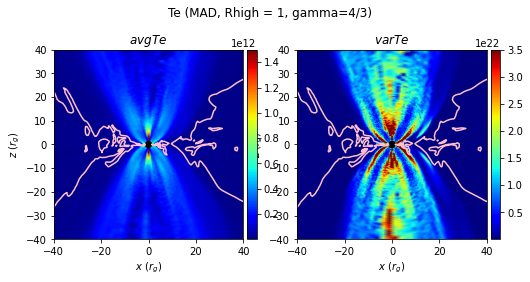

In [25]:
w = (-40,40,-40,40)
fig, axes = plt.subplots(1,2, figsize=(8,4))
# any dump obj in dumps array will give the same average value (avg for these dumps)
# dumps[str(i0)].cache.values = list(dumps[str(i0)].cache.values())[0]
pplt.plot_xz(axes[0], dumps[str(i0)], 'avgTe', window=w, vmin=10**7, vmax=1.5*10**12)
pplt.plot_xz(axes[1], dumps[str(i0)], 'varTe', window=w, vmin=10**14, vmax=3.5*10**22)
pplt.overlay_contours(axes[0], dumps[str(i0)], 'beta', (1.0,), color='pink')
pplt.overlay_contours(axes[1], dumps[str(i0)], 'beta',(1.0,), color='pink')
plt.suptitle('Te (MAD, Rhigh = 1, gamma=4/3)')
plt.show()

In [19]:
# It looks like RHO is not in dump.cache; instead, it's in dump. So, use 'Pg' as a substitute
Pg_Ma_avg1 = average(range(i0, i1), ['Pg'], dumps)
for dump in dumps.values():
    # if type(dump) is not str:
    dump.cache['avgPg'] = np.squeeze(np.array(list(Pg_Ma_avg1.values())))

finish average calculation.


In [20]:
Pg_Ma_var1 = variance(range(i0, i1), dumps, 'Pg')
for dump in dumps.values():
    # if type(dump) is not str:
    dump.cache['varPg'] = np.squeeze(np.array(list(Pg_Ma_var1.values())))

finish variance calculation's loop


In [21]:
get_statistics(dumps, 'avgPg')
print()
get_statistics(dumps, 'varPg')

statistics on avgPg:
max avgPg:
4.984904e+00
percentile on avgPg [50%, 75%, 90%]:
[8.64832292e-05 1.78635592e-03 2.01206909e-02]

statistics on varPg:
max varPg:
1.379957e+01
percentile on varPg [50%, 75%, 90%]:
[2.72379103e-10 5.68285937e-07 1.99489762e-04]


In [22]:
B2_Ma_avg1 = average(range(i0, i1), ['bsq'], dumps)
for dump in dumps.values():
    dump.cache['avgbsq'] = np.squeeze(np.array(list(B2_Ma_avg1.values())))

finish average calculation.


In [23]:
B2_Ma_var1 = variance(range(i0, i1), dumps, 'bsq')
for dump in dumps.values():
    dump.cache['varbsq'] = np.squeeze(np.array(list(B2_Ma_var1.values())))

finish variance calculation's loop


In [24]:
get_statistics(dumps, 'avgbsq')
print()
get_statistics(dumps, 'varbsq')

statistics on avgbsq:
max avgbsq:
3.121569e+01
percentile on avgbsq [50%, 75%, 90%]:
[3.85053203e-04 5.07612977e-02 1.64162192e+00]

statistics on varbsq:
max varbsq:
6.179953e+01
percentile on varbsq [50%, 75%, 90%]:
[1.32217021e-08 6.97967578e-05 3.86021385e-02]


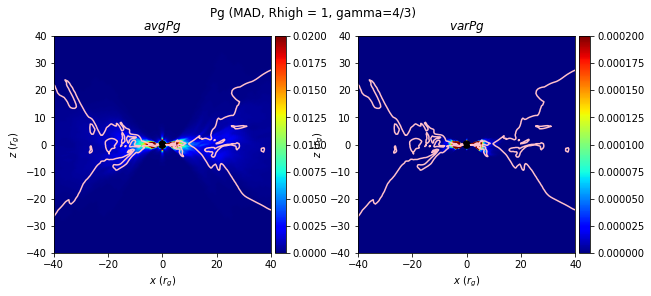

In [25]:
w = (-40,40,-40,40)
fig, axes = plt.subplots(1,2, figsize=(10,4))
# any dump obj in dumps array will give the same average value (avg for these dumps)
# dumps[str(i0)].cache.values = list(dumps[str(i0)].cache.values())[0]
pplt.plot_xz(axes[0], dumps[str(i0)], 'avgPg', window=w, vmin=0., vmax=0.02)
pplt.plot_xz(axes[1], dumps[str(i0)], 'varPg', window=w, vmin=0., vmax=2e-4)
pplt.overlay_contours(axes[0], dumps[str(i0)], 'beta', (1.0,), color='pink')
pplt.overlay_contours(axes[1], dumps[str(i0)], 'beta',(1.0,), color='pink')
plt.suptitle('Pg (MAD, Rhigh = 1, gamma=4/3)')
plt.show()

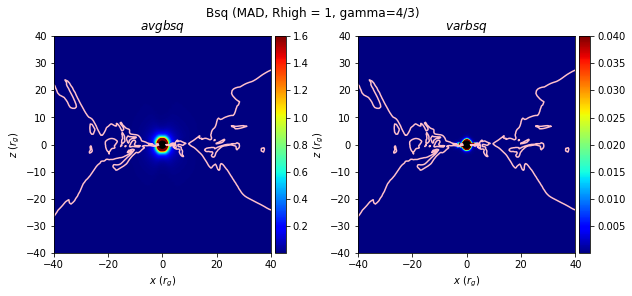

In [62]:
fig, axes = plt.subplots(1,2, figsize=(10,4))
pplt.plot_xz(axes[0], dumps[str(i0)], 'avgbsq', window=w, vmin=4e-4, vmax=1.6)
pplt.plot_xz(axes[1], dumps[str(i0)], 'varbsq', window=w, vmin=1e-8, vmax=4e-2)
pplt.overlay_contours(axes[0], dumps[str(i0)], 'beta', (1.0,), color='pink')
pplt.overlay_contours(axes[1], dumps[str(i0)], 'beta',(1.0,), color='pink')
plt.suptitle('Bsq (MAD, Rhigh = 1, gamma=4/3)')
plt.show()

In [26]:
MI(dumps, i0)

In [27]:
get_statistics(dumps, 'MI(Te)')

statistics on MI:
max MI:
3.703199e+00
percentile on avgTe [50%, 75%, 90%]:
[0.1608464  0.38871943 0.64524071]


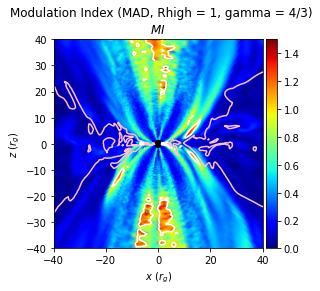

In [28]:
fig, ax = plt.subplots(1,1, figsize=(4,4))
pplt.plot_xz(ax, dumps[str(i0)], 'MI', window=w, vmin=0., vmax=1.5)
plt.suptitle('Modulation Index (MAD, Rhigh = 1, gamma = 4/3)')
pplt.overlay_contours(ax, dumps[str(i0)], 'beta',(1.0,), color='pink')
# 1 σ away, i.e. MI > 1
pplt.overlay_contours(ax, dumps[str(i0)], 'MI',(1.0, 1.5), color='white')
plt.show()

In [26]:
MI(dumps, i0, 'Pg')
MI(dumps, i0, 'bsq')

In [27]:
get_statistics(dumps, 'MI(Pg)')
print()
get_statistics(dumps, 'MI(bsq)')

statistics on MI(Pg):
max MI(Pg):
5.172663e+00
percentile on MI(Pg) [50%, 75%, 90%]:
[0.21748084 0.57933588 1.15565654]

statistics on MI(bsq):
max MI(bsq):
2.696440e+00
percentile on MI(bsq) [50%, 75%, 90%]:
[0.15269347 0.40771213 0.66896539]


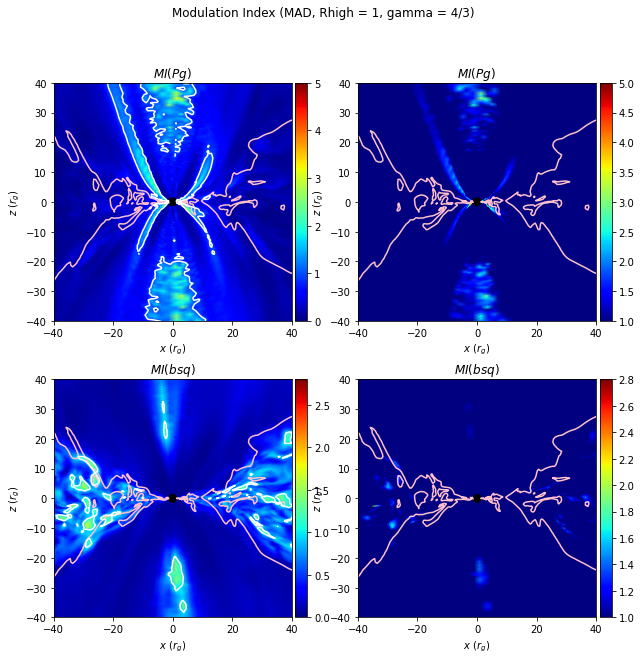

In [30]:
# first row: Pg 
# second row: bsq
fig, axes = plt.subplots(2,2, figsize=(10,10))
pplt.plot_xz(axes[0,0], dumps[str(i0)], 'MI(Pg)', window=(-40, 40, -40, 40), vmin=0., vmax=5.)
pplt.overlay_contours(axes[0,0], dumps[str(i0)], 'beta',(1.0,), color='pink')
pplt.overlay_contours(axes[0,0], dumps[str(i0)], 'MI(Pg)',(1.0, ), color='white')
# 1 σ away, i.e. MI > 1
pplt.plot_xz(axes[0,1], dumps[str(i0)], 'MI(Pg)', window=(-40, 40, -40, 40), vmin=1., vmax=5.)
pplt.overlay_contours(axes[0,1], dumps[str(i0)], 'beta',(1.0,), color='pink')

pplt.plot_xz(axes[1,0], dumps[str(i0)], 'MI(bsq)', window=(-40, 40, -40, 40), vmin=0., vmax=2.8)
pplt.overlay_contours(axes[1,0], dumps[str(i0)], 'beta',(1.0,), color='pink')
pplt.overlay_contours(axes[1,0], dumps[str(i0)], 'MI(bsq)',(1.0, ), color='white')
pplt.plot_xz(axes[1,1], dumps[str(i0)], 'MI(bsq)', window=(-40, 40, -40, 40), vmin=1., vmax=2.8)
pplt.overlay_contours(axes[1,1], dumps[str(i0)], 'beta',(1.0,), color='pink')

plt.suptitle('Modulation Index (MAD, Rhigh = 1, gamma = 4/3)')
plt.show()

In [18]:
# electron temperature, sane model, R_high = 1
dumps_sa = get_dumps(i0, i1, src_sa_10M)
Te_sa_rh1 = {} 
dict_keys = dumps_sa.keys()
for key in dict_keys:
    Te_sa = Te(dumps_sa[key], R_high[0], R_low, 4/3)
    Te_sa_rh1[key] = Te_sa

In [19]:
dump0 = pyharm.load_dump(fname(i0, src_sa_10M))

In [20]:
# average
Te_Sa_avg1 = average(range(i0, i1), ['Te'], dumps_sa)
for dump in dumps_sa.values():
    dump.cache['avgTe'] = np.squeeze(np.array(list(Te_Sa_avg1.values())))

finish average calculation.


In [21]:
print(dumps_sa[str(i0)].cache.keys())

dict_keys(['Pg', 'Gamma', 'ucon', 'ucov', 'bcon', 'bcov', 'bsq', 'Pb', 'beta', 'Te', 'avgTe'])


In [22]:
# variance
Te_Sa_var1 = variance(range(i0, i1), dumps_sa)
for dump in dumps_sa.values():
    # if type(dump) is not str:
    dump.cache['varTe'] = np.squeeze(np.array(list(Te_Sa_var1.values())))

finish variance calculation's loop


In [23]:
print(dumps_sa[str(i0)].cache.keys())

dict_keys(['Pg', 'Gamma', 'ucon', 'ucov', 'bcon', 'bcov', 'bsq', 'Pb', 'beta', 'Te', 'avgTe', 'varTe'])


In [24]:
get_statistics(dumps_sa, 'avgTe')
print()
get_statistics(dumps_sa, 'varTe')

statistics on avgTe:
max avgTe:
1.106060e+12
percentile on avgTe [50%, 75%, 90%]:
[2.04398176e+10 8.03298082e+10 1.56672642e+11]

statistics on varTe:
max varTe:
2.158594e+23
percentile on avgTe [50%, 75%, 90%]:
[1.07743313e+18 9.20549590e+19 3.43363507e+21]


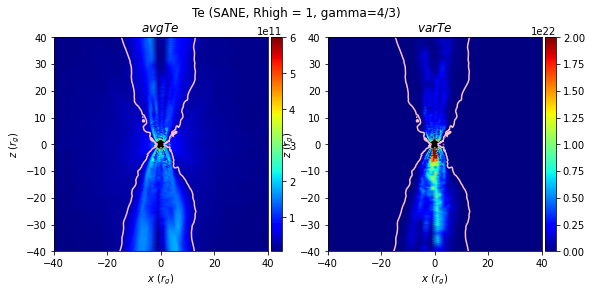

In [25]:
w = (-40,40,-40,40)
fig, axes = plt.subplots(1,2, figsize=(9,4))
# any dump obj in dumps array will give the same average value (avg for these dumps)
# dumps[str(i0)].cache.values = list(dumps[str(i0)].cache.values())[0]
pplt.plot_xz(axes[0], dumps_sa[str(i0)], 'avgTe', window=w, vmin=5*10**9, vmax=6.*10**11)
pplt.plot_xz(axes[1], dumps_sa[str(i0)], 'varTe', window=w, vmin=5*10**11, vmax=2.*10**22)
pplt.overlay_contours(axes[0], dumps_sa[str(i0)], 'beta',(1.0,), color='pink')
pplt.overlay_contours(axes[1], dumps_sa[str(i0)], 'beta',(1.0,), color='pink')
plt.suptitle('Te (SANE, Rhigh = 1, gamma=4/3)')
plt.show()

In [39]:
# It looks like RHO is not in dump.cache; instead, it's in dump. So, use 'Pg' as a substitute
Pg_sa_avg1 = average(range(i0, i1), ['Pg'], dumps_sa)
for dump in dumps_sa.values():
    dump.cache['avgPg'] = np.squeeze(np.array(list(Pg_sa_avg1.values())))

finish average calculation.


In [42]:
Pg_sa_var1 = variance(range(i0, i1), dumps_sa, 'Pg')
for dump in dumps_sa.values():
    # if type(dump) is not str:
    dump.cache['varPg'] = np.squeeze(np.array(list(Pg_sa_var1.values())))

finish variance calculation's loop


In [55]:
get_statistics(dumps_sa, 'avgPg')
print()
get_statistics(dumps_sa, 'varPg')

statistics on avgPg:
max avgPg:
4.984904e+00
percentile on avgPg [50%, 75%, 90%]:
[8.64832292e-05 1.78635592e-03 2.01206909e-02]

statistics on varPg:
max varPg:
1.379957e+01
percentile on varPg [50%, 75%, 90%]:
[2.72379103e-10 5.68285937e-07 1.99489762e-04]


In [47]:
B2_sa_avg1 = average(range(i0, i1), ['bsq'], dumps_sa)
for dump in dumps.values():
    dump.cache['avgbsq'] = np.squeeze(np.array(list(B2_sa_avg1.values())))

finish average calculation.


In [48]:
B2_sa_var1 = variance(range(i0, i1), dumps_sa, 'bsq')
for dump in dumps_sa.values():
    dump.cache['varbsq'] = np.squeeze(np.array(list(B2_sa_var1.values())))

finish variance calculation's loop


In [56]:
get_statistics(dumps_sa, 'avgbsq')
print()
get_statistics(dumps_sa, 'varbsq')

statistics on avgbsq:
max avgbsq:
3.121569e+01
percentile on avgbsq [50%, 75%, 90%]:
[3.85053203e-04 5.07612977e-02 1.64162192e+00]

statistics on varbsq:
max varbsq:
6.179953e+01
percentile on varbsq [50%, 75%, 90%]:
[1.32217021e-08 6.97967578e-05 3.86021385e-02]


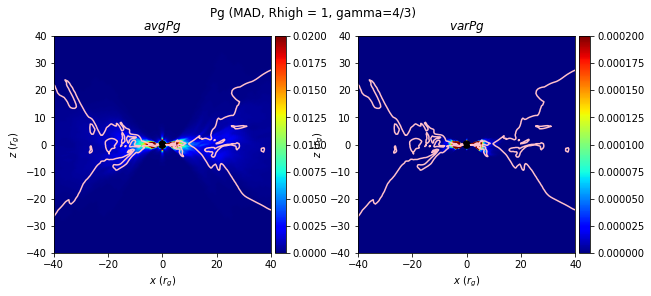

In [61]:
w = (-40,40,-40,40)
fig, axes = plt.subplots(1,2, figsize=(10,4))
# any dump obj in dumps array will give the same average value (avg for these dumps)
# dumps[str(i0)].cache.values = list(dumps[str(i0)].cache.values())[0]
pplt.plot_xz(axes[0], dumps_sa[str(i0)], 'avgPg', window=w, vmin=0., vmax=0.02)
pplt.plot_xz(axes[1], dumps_sa[str(i0)], 'varPg', window=w, vmin=0., vmax=2e-4)
pplt.overlay_contours(axes[0], dumps_sa[str(i0)], 'beta', (1.0,), color='pink')
pplt.overlay_contours(axes[1], dumps_sa[str(i0)], 'beta',(1.0,), color='pink')
plt.suptitle('Pg (MAD, Rhigh = 1, gamma=4/3)')
plt.show()

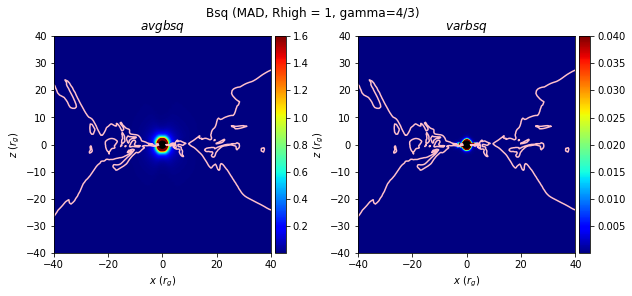

In [62]:
fig, axes = plt.subplots(1,2, figsize=(10,4))
pplt.plot_xz(axes[0], dumps_sa[str(i0)], 'avgbsq', window=w, vmin=4e-4, vmax=1.6)
pplt.plot_xz(axes[1], dumps_sa[str(i0)], 'varbsq', window=w, vmin=1e-8, vmax=4e-2)
pplt.overlay_contours(axes[0], dumps_sa[str(i0)], 'beta', (1.0,), color='pink')
pplt.overlay_contours(axes[1], dumps_sa[str(i0)], 'beta',(1.0,), color='pink')
plt.suptitle('Bsq (MAD, Rhigh = 1, gamma=4/3)')
plt.show()

In [26]:
MI(dumps_sa, i0)

In [27]:
get_statistics(dumps_sa, 'MI')

statistics on MI:
max MI:
1.946759e+00
percentile on avgTe [50%, 75%, 90%]:
[0.05051405 0.11842799 0.39123666]


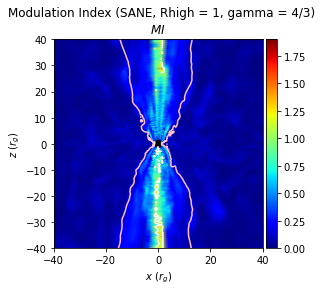

In [28]:
fig, ax = plt.subplots(1,1, figsize=(4,4))
pplt.plot_xz(ax, dumps_sa[str(i0)], 'MI', window=w, vmin=0., vmax=1.9)
pplt.overlay_contours(ax, dumps_sa[str(i0)], 'beta',(1.0,), color='pink')
# 1σ and above
pplt.overlay_contours(ax, dumps_sa[str(i0)], 'MI',[1.0,], color='white')
plt.suptitle('Modulation Index (SANE, Rhigh = 1, gamma = 4/3)')
plt.show()

In [18]:
# MAD, R_h = 10
dumps_rh10 = change_Rh(i0, i1, src_ma_10M, 1)

finish reading in dumps
finish average calculation.
finish variance calculation's loop


In [19]:
print('statistics on avgTe:')
print('max avgTe:')
maximum = np.max(dumps_rh10[str(i0)].cache['avgTe'])
print("{:e}".format(maximum))
print('percentile on avgTe [25%, 50%, 75%]:')
# percentile of the flattened grid
percentile = np.percentile(dumps_rh10[str(i0)].cache['avgTe'], [25, 50, 75])
print(percentile)

statistics on avgTe:
max avgTe:
3.955100e+12
percentile on avgTe [25%, 50%, 75%]:
[1.14202237e+09 1.21081302e+10 2.46248211e+11]


In [20]:
print('statistics on varTe:')
print('max varTe:')
maximum = np.max(dumps_rh10[str(i0)].cache['varTe'])
print("{:e}".format(maximum))
print('percentile on varTe [25%, 50%, 75%]:')
# percentile of the flattened grid
percentile = np.percentile(dumps_rh10[str(i0)].cache['varTe'], [25, 50, 75])
print(percentile)

statistics on varTe:
max varTe:
3.062345e+24
percentile on varTe [25%, 50%, 75%]:
[2.48536334e+15 1.52785796e+19 9.10384406e+21]


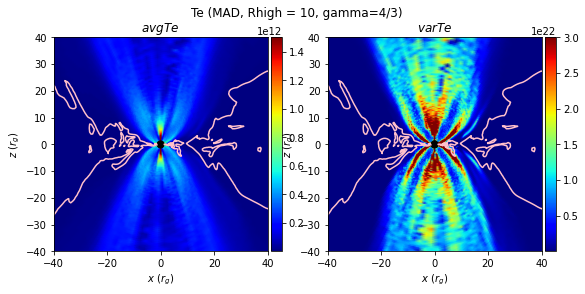

In [21]:
w = (-40,40,-40,40)
fig, axes = plt.subplots(1,2, figsize=(9,4))
# any dump obj in dumps array will give the same average value (avg for these dumps)
# dumps[str(i0)].cache.values = list(dumps[str(i0)].cache.values())[0]
pplt.plot_xz(axes[0], dumps_rh10[str(i0)], 'avgTe', window=w, vmin=10**7, vmax=1.5*10**12)
pplt.plot_xz(axes[1], dumps_rh10[str(i0)], 'varTe', window=w, vmin=10**14, vmax=3.*10**22)
pplt.overlay_contours(axes[0], dumps_rh10[str(i0)], 'beta',(1.0,), color='pink')
pplt.overlay_contours(axes[1], dumps_rh10[str(i0)], 'beta',(1.0,), color='pink')
plt.suptitle('Te (MAD, Rhigh = 10, gamma=4/3)')
plt.show()

In [22]:
MI(dumps_rh10, i0)

In [23]:
get_statistics(dumps_rh10, 'MI')

statistics on MI:
max MI:
3.702612e+00
percentile on avgTe [50%, 75%, 90%]:
[0.20371762 0.49224325 0.78175387]


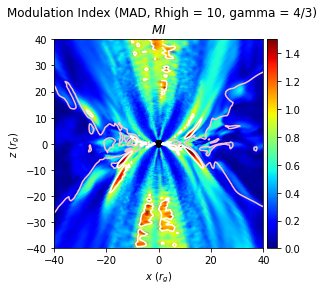

In [28]:
fig, ax = plt.subplots(1,1, figsize=(4,4))
pplt.plot_xz(ax, dumps_rh10[str(i0)], 'MI', window=w, vmin=0., vmax=1.5)
pplt.overlay_contours(ax, dumps_rh10[str(i0)], 'beta',(1.0,), color='pink')
pplt.overlay_contours(ax, dumps_rh10[str(i0)], 'MI',[1.0,], color='white')
plt.suptitle('Modulation Index (MAD, Rhigh = 10, gamma = 4/3)')
plt.show()

In [18]:
# SANE, R_h = 10 (idx=1)
dumps_sa_rh10 = change_Rh(i0, i1, src_sa_10M, 1)

finish reading in dumps
finish average calculation.
finish variance calculation's loop


In [20]:
get_statistics(dumps_sa_rh10, 'avgTe')
print()
get_statistics(dumps_sa_rh10, 'varTe')

statistics on avgTe:
max avgTe:
1.062080e+12
percentile on avgTe [50%, 75%, 90%]:
[2.39230478e+09 1.39608700e+10 1.23367243e+11]

statistics on varTe:
max varTe:
1.771752e+23
percentile on avgTe [50%, 75%, 90%]:
[1.63746207e+16 5.49321694e+18 3.43137936e+21]


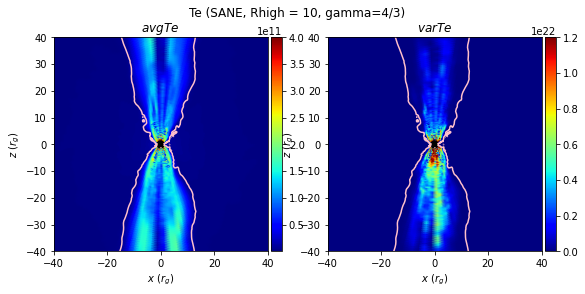

In [24]:
w = (-40,40,-40,40)
fig, axes = plt.subplots(1,2, figsize=(9,4))
# any dump obj in dumps array will give the same average value (avg for these dumps)
# dumps[str(i0)].cache.values = list(dumps[str(i0)].cache.values())[0]
pplt.plot_xz(axes[0], dumps_sa_rh10[str(i0)], 'avgTe', window=w, vmin=10**6, vmax=4.*10**11)
pplt.plot_xz(axes[1], dumps_sa_rh10[str(i0)], 'varTe', window=w, vmin=10**12, vmax=1.2*10**22)
pplt.overlay_contours(axes[0], dumps_sa_rh10[str(i0)], 'beta',(1.0,), color='pink')
pplt.overlay_contours(axes[1], dumps_sa_rh10[str(i0)], 'beta',(1.0,), color='pink')
plt.suptitle('Te (SANE, Rhigh = 10, gamma=4/3)')
plt.show()

In [25]:
MI(dumps_sa_rh10, i0)

In [26]:
get_statistics(dumps_sa_rh10, 'MI')

statistics on MI:
max MI:
3.101012e+00
percentile on avgTe [50%, 75%, 90%]:
[0.05155199 0.15336322 0.54072402]


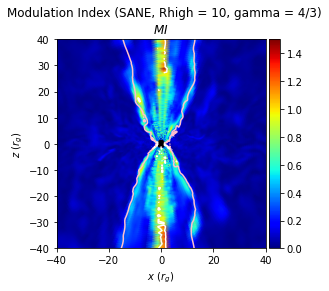

In [28]:
fig, ax = plt.subplots(1,1, figsize=(4,4))
pplt.plot_xz(ax, dumps_sa_rh10[str(i0)], 'MI', window=w, vmin=0., vmax=1.5)
pplt.overlay_contours(ax, dumps_sa_rh10[str(i0)], 'beta',(1.0,), color='pink')
pplt.overlay_contours(ax, dumps_sa_rh10[str(i0)], 'MI',[1.0,], color='white')
plt.suptitle('Modulation Index (SANE, Rhigh = 10, gamma = 4/3)')
plt.show()

In [ ]:
# MAD, R_h = 40
dumps_rh40 = change_Rh(i0, i1, src_ma_10M, 2)

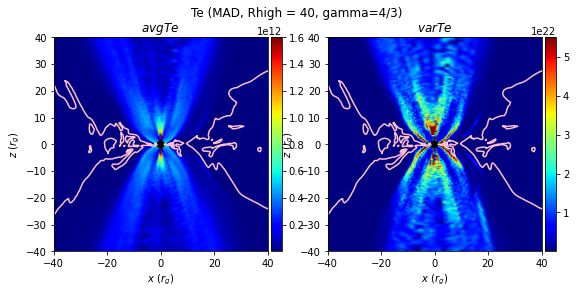

In [18]:
w = (-40,40,-40,40)
fig, axes = plt.subplots(1,2, figsize=(9,4))
# any dump obj in dumps array will give the same average value (avg for these dumps)
# dumps[str(i0)].cache.values = list(dumps[str(i0)].cache.values())[0]
pplt.plot_xz(axes[0], dumps_rh40[str(i0)], 'avgTe', window=w, vmin=10**7, vmax=1.6*10**12)
pplt.plot_xz(axes[1], dumps_rh40[str(i0)], 'varTe', window=w, vmin=10**13, vmax=5.5*10**22)
pplt.overlay_contours(axes[0], dumps_rh40[str(i0)], 'beta',(1.0,), color='pink')
pplt.overlay_contours(axes[1], dumps_rh40[str(i0)], 'beta',(1.0,), color='pink')
plt.suptitle('Te (MAD, Rhigh = 40, gamma=4/3)')
plt.show()

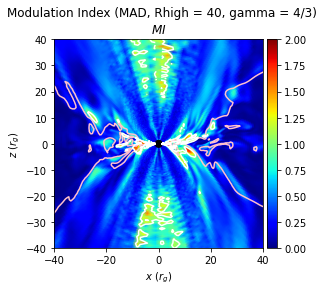

In [19]:
MI(dumps_rh40, i0)
fig, ax = plt.subplots(1,1, figsize=(4,4))
pplt.plot_xz(ax, dumps_rh40[str(i0)], 'MI', window=w, vmin=0., vmax=2.)
pplt.overlay_contours(ax, dumps_rh40[str(i0)], 'beta',(1.0,), color='pink')
pplt.overlay_contours(ax, dumps_rh40[str(i0)], 'MI',[1.0,], color='white')
plt.suptitle('Modulation Index (MAD, Rhigh = 40, gamma = 4/3)')
plt.show()

In [18]:
# SANE, R_h = 40 (idx=2)
dumps_sa_rh40 = change_Rh(i0, i1, src_sa_10M, 2)

finish reading in dumps
finish average calculation.
finish variance calculation's loop


In [19]:
get_statistics(dumps_sa_rh40, 'avgTe')
print()
get_statistics(dumps_sa_rh40, 'varTe')

statistics on avgTe:
max avgTe:
1.016850e+12
percentile on avgTe [50%, 75%, 90%]:
[6.05582524e+08 3.94689085e+09 1.16117214e+11]

statistics on varTe:
max varTe:
1.610341e+23
percentile on avgTe [50%, 75%, 90%]:
[1.07232050e+15 7.79316226e+17 3.29648255e+21]


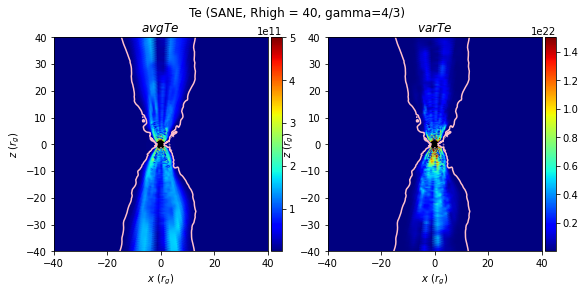

In [24]:
w = (-40,40,-40,40)
fig, axes = plt.subplots(1,2, figsize=(9,4))
# any dump obj in dumps array will give the same average value (avg for these dumps)
# dumps[str(i0)].cache.values = list(dumps[str(i0)].cache.values())[0]
pplt.plot_xz(axes[0], dumps_sa_rh40[str(i0)], 'avgTe', window=w, vmin=10**8, vmax=5.*10**11)
pplt.plot_xz(axes[1], dumps_sa_rh40[str(i0)], 'varTe', window=w, vmin=10**15, vmax=1.5*10**22)
pplt.overlay_contours(axes[0], dumps_sa_rh40[str(i0)], 'beta',(1.0,), color='pink')
pplt.overlay_contours(axes[1], dumps_sa_rh40[str(i0)], 'beta',(1.0,), color='pink')
plt.suptitle('Te (SANE, Rhigh = 40, gamma=4/3)')
plt.show()

In [25]:
MI(dumps_sa_rh40, i0)

In [26]:
get_statistics(dumps_sa_rh40, 'MI')

statistics on MI:
max MI:
4.391530e+00
percentile on avgTe [50%, 75%, 90%]:
[0.05269962 0.17116164 0.64185886]


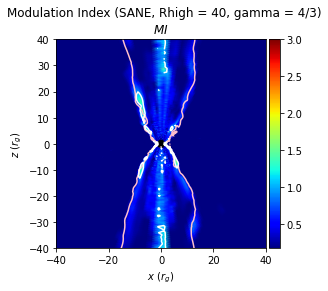

In [27]:
# ? why there's a region where MI > 1 and outside β=1? turbulance on the fringe of the funnel?
fig, ax = plt.subplots(1,1, figsize=(4,4))
pplt.plot_xz(ax, dumps_sa_rh40[str(i0)], 'MI', window=w, vmin=0.17, vmax=3.)
pplt.overlay_contours(ax, dumps_sa_rh40[str(i0)], 'beta',(1.0,), color='pink')
pplt.overlay_contours(ax, dumps_sa_rh40[str(i0)], 'MI', [1.0,], color='white')
plt.suptitle('Modulation Index (SANE, Rhigh = 40, gamma = 4/3)')
plt.show()

In [18]:
# MAD, R_h = 160
dumps_rh160 = change_Rh(i0, i1, src_ma_10M, 3)

finish reading in dumps
finish average calculation.
finish variance calculation's loop


In [19]:
get_statistics(dumps_rh160, 'avgTe')
print()
get_statistics(dumps_rh160, 'varTe')

statistics on avgTe:
max avgTe:
3.415459e+12
percentile on avgTe [50%, 75%, 90%]:
[1.39218986e+09 2.19607970e+11 4.76478301e+11]

statistics on varTe:
max varTe:
1.676698e+24
percentile on avgTe [50%, 75%, 90%]:
[5.26373749e+17 8.25218051e+21 3.53397621e+22]


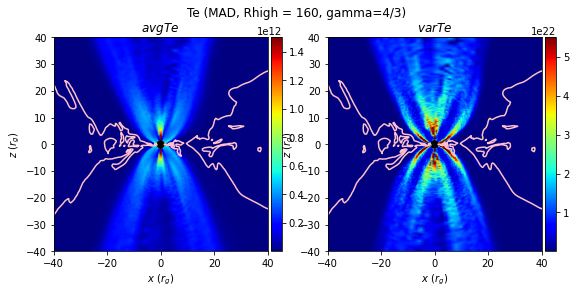

In [20]:
w = (-40,40,-40,40)
fig, axes = plt.subplots(1,2, figsize=(9,4))
# any dump obj in dumps array will give the same average value (avg for these dumps)
# dumps[str(i0)].cache.values = list(dumps[str(i0)].cache.values())[0]
pplt.plot_xz(axes[0], dumps_rh160[str(i0)], 'avgTe', window=w, vmin=10**8, vmax=1.5*10**12)
pplt.plot_xz(axes[1], dumps_rh160[str(i0)], 'varTe', window=w, vmin=10**16, vmax=5.5*10**22)
pplt.overlay_contours(axes[0], dumps_rh160[str(i0)], 'beta',(1.0,), color='pink')
pplt.overlay_contours(axes[1], dumps_rh160[str(i0)], 'beta',(1.0,), color='pink')
plt.suptitle('Te (MAD, Rhigh = 160, gamma=4/3)')
plt.show()

In [21]:
MI(dumps_rh160, i0)

In [22]:
get_statistics(dumps_rh160, 'MI')

statistics on MI:
max MI:
5.341459e+00
percentile on avgTe [50%, 75%, 90%]:
[0.22355996 0.61046416 1.15712231]


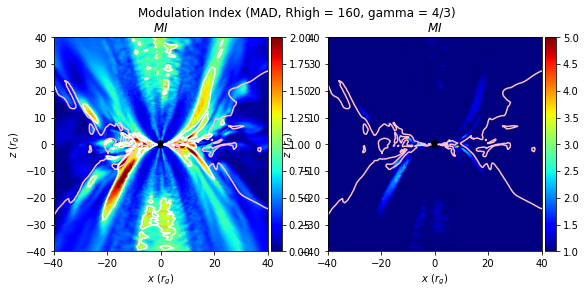

In [24]:
fig, axes = plt.subplots(1,2, figsize=(9,4))
pplt.plot_xz(axes[0], dumps_rh160[str(i0)], 'MI', window=w, vmin=0., vmax=2.)
pplt.overlay_contours(axes[0], dumps_rh160[str(i0)], 'beta',(1.0,), color='pink')
pplt.overlay_contours(axes[0], dumps_rh160[str(i0)], 'MI',[1.0,], color='white')
pplt.plot_xz(axes[1], dumps_rh160[str(i0)], 'MI', window=w, vmin=1., vmax=5.)
pplt.overlay_contours(axes[1], dumps_rh160[str(i0)], 'beta',(1.0,), color='pink')
plt.suptitle('Modulation Index (MAD, Rhigh = 160, gamma = 4/3)')
plt.show()

In [18]:
# SANE, R_h = 160 (idx=3)
dumps_sa_rh160 = change_Rh(i0, i1, src_sa_10M, 3)

finish reading in dumps
finish average calculation.
finish variance calculation's loop


In [19]:
get_statistics(dumps_sa_rh160, 'avgTe')
print()
get_statistics(dumps_sa_rh160, 'varTe')

statistics on avgTe:
max avgTe:
9.766633e+11
percentile on avgTe [50%, 75%, 90%]:
[1.51891560e+08 1.01151416e+09 1.04294193e+11]

statistics on varTe:
max varTe:
1.170283e+23
percentile on avgTe [50%, 75%, 90%]:
[6.78531805e+13 7.87886020e+16 2.97923864e+21]


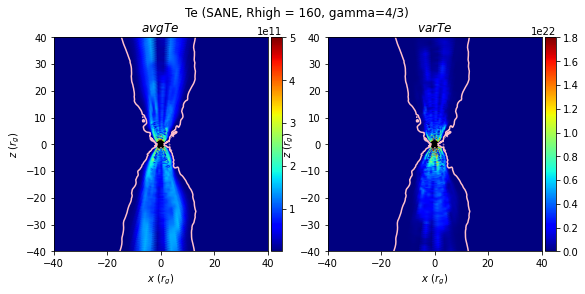

In [22]:
w = (-40,40,-40,40)
fig, axes = plt.subplots(1,2, figsize=(9,4))
# any dump obj in dumps array will give the same average value (avg for these dumps)
# dumps[str(i0)].cache.values = list(dumps[str(i0)].cache.values())[0]
pplt.plot_xz(axes[0], dumps_sa_rh160[str(i0)], 'avgTe', window=w, vmin=10**6, vmax=5.*10**11)
pplt.plot_xz(axes[1], dumps_sa_rh160[str(i0)], 'varTe', window=w, vmin=10**11, vmax=1.8*10**22)
pplt.overlay_contours(axes[0], dumps_sa_rh160[str(i0)], 'beta',(1.0,), color='pink')
pplt.overlay_contours(axes[1], dumps_sa_rh160[str(i0)], 'beta',(1.0,), color='pink')
plt.suptitle('Te (SANE, Rhigh = 160, gamma=4/3)')
plt.show()

In [23]:
MI(dumps_sa_rh160, i0)

In [26]:
get_statistics(dumps_sa_rh160, 'MI')

statistics on MI:
max MI:
4.881720e+00
percentile on avgTe [50%, 75%, 90%]:
[0.05367733 0.18209403 0.71207403]


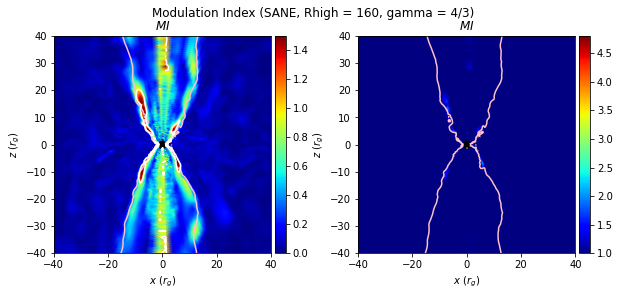

In [38]:
fig, axes = plt.subplots(1,2, figsize=(10,4))
pplt.plot_xz(axes[0], dumps_sa_rh160[str(i0)], 'MI', window=w, vmin=0., vmax=1.5)
pplt.overlay_contours(axes[0], dumps_sa_rh160[str(i0)], 'beta',(1.0,), color='pink')
pplt.overlay_contours(axes[0], dumps_sa_rh160[str(i0)], 'MI',[1.0,], color='white')
pplt.plot_xz(axes[1], dumps_sa_rh160[str(i0)], 'MI', window=w, vmin=1., vmax=4.8)
pplt.overlay_contours(axes[1], dumps_sa_rh160[str(i0)], 'beta',(1.0,), color='pink')
plt.suptitle('Modulation Index (SANE, Rhigh = 160, gamma = 4/3)')
plt.show()

## $\gamma = \frac{5}{3}$

In [18]:
# MAD, R_h = 1
dumps_rh1 = change_Rh(i0, i1, src_ma_10M, 0, 5/3)

finish reading in dumps
finish average calculation.
finish variance calculation's loop


In [19]:
get_statistics(dumps_rh1, 'avgTe')
print()
get_statistics(dumps_rh1, 'varTe')

statistics on avgTe:
max avgTe:
6.488609e+12
percentile on avgTe [50%, 75%, 90%]:
[6.36162789e+10 4.48773188e+11 8.49219592e+11]

statistics on varTe:
max varTe:
3.139657e+25
percentile on avgTe [50%, 75%, 90%]:
[9.34147334e+19 2.63578401e+22 1.03071675e+23]


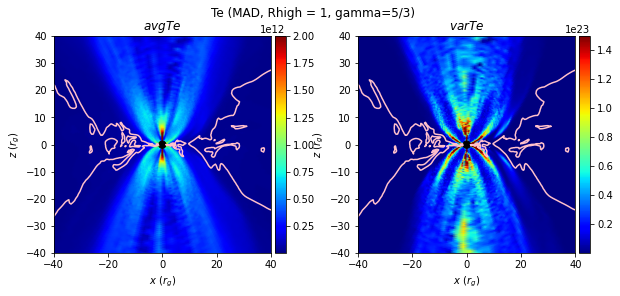

In [22]:
w = (-40,40,-40,40)
fig, axes = plt.subplots(1,2, figsize=(10,4))
pplt.plot_xz(axes[0], dumps_rh1[str(i0)], 'avgTe', window=w, vmin=10**7, vmax=2.*10**12)
pplt.plot_xz(axes[1], dumps_rh1[str(i0)], 'varTe', window=w, vmin=10**15, vmax=1.5*10**23)
pplt.overlay_contours(axes[0], dumps_rh1[str(i0)], 'beta',(1.0,), color='pink')
pplt.overlay_contours(axes[1], dumps_rh1[str(i0)], 'beta',(1.0,), color='pink')
plt.suptitle('Te (MAD, Rhigh = 1, gamma=5/3)')
plt.show()

In [23]:
MI(dumps_rh1, i0)

In [24]:
get_statistics(dumps_rh1, 'MI')

statistics on MI:
max MI:
3.703199e+00
percentile on avgTe [50%, 75%, 90%]:
[0.1608464  0.38871943 0.64524071]


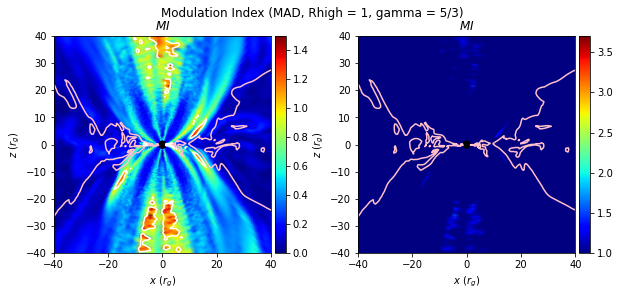

In [27]:
fig, axes = plt.subplots(1,2, figsize=(10,4))
pplt.plot_xz(axes[0], dumps_rh1[str(i0)], 'MI', window=w, vmin=0., vmax=1.5)
pplt.overlay_contours(axes[0], dumps_rh1[str(i0)], 'beta',(1.0,), color='pink')
pplt.overlay_contours(axes[0], dumps_rh1[str(i0)], 'MI', [1.0,], color='white')
pplt.plot_xz(axes[1], dumps_rh1[str(i0)], 'MI', window=w, vmin=1., vmax=3.7)
pplt.overlay_contours(axes[1], dumps_rh1[str(i0)], 'beta',(1.0,), color='pink')
plt.suptitle('Modulation Index (MAD, Rhigh = 1, gamma = 5/3)')
plt.show()

In [18]:
# SANE, R_h = 1 (idx=0)
dumps_sa_rh1 = change_Rh(i0, i1, src_sa_10M, 0, 5/3)

finish reading in dumps
finish average calculation.
finish variance calculation's loop


In [19]:
get_statistics(dumps_sa_rh1, 'avgTe')
print()
get_statistics(dumps_sa_rh1, 'varTe')

statistics on avgTe:
max avgTe:
1.797347e+12
percentile on avgTe [50%, 75%, 90%]:
[3.32147037e+10 1.30535938e+11 2.54593043e+11]

statistics on varTe:
max varTe:
5.700036e+23
percentile on avgTe [50%, 75%, 90%]:
[2.84509686e+18 2.43082626e+20 9.06694260e+21]


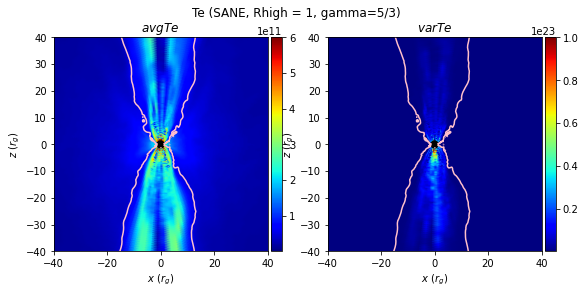

In [23]:
w = (-40,40,-40,40)
fig, axes = plt.subplots(1,2, figsize=(9,4))
# any dump obj in dumps array will give the same average value (avg for these dumps)
# dumps[str(i0)].cache.values = list(dumps[str(i0)].cache.values())[0]
pplt.plot_xz(axes[0], dumps_sa_rh1[str(i0)], 'avgTe', window=w, vmin=3*10**8, vmax=6.*10**11)
pplt.plot_xz(axes[1], dumps_sa_rh1[str(i0)], 'varTe', window=w, vmin=3*10**15, vmax=1.*10**23)
pplt.overlay_contours(axes[0], dumps_sa_rh1[str(i0)], 'beta',(1.0,), color='pink')
pplt.overlay_contours(axes[1], dumps_sa_rh1[str(i0)], 'beta',(1.0,), color='pink')
plt.suptitle('Te (SANE, Rhigh = 1, gamma=5/3)')
plt.show()

In [24]:
MI(dumps_sa_rh1, i0)

In [25]:
get_statistics(dumps_sa_rh1, 'MI')

statistics on MI:
max MI:
1.946759e+00
percentile on avgTe [50%, 75%, 90%]:
[0.05051405 0.11842799 0.39123666]


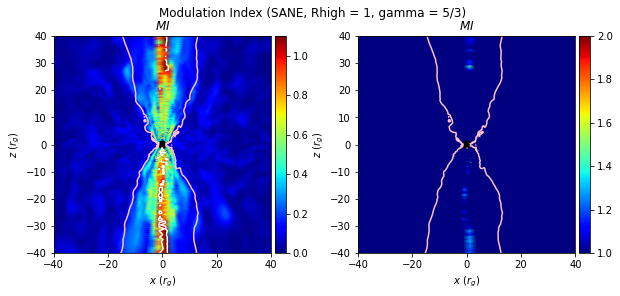

In [26]:
fig, axes = plt.subplots(1,2, figsize=(10,4))
pplt.plot_xz(axes[0], dumps_sa_rh1[str(i0)], 'MI', window=w, vmin=0., vmax=1.1)
pplt.overlay_contours(axes[0], dumps_sa_rh1[str(i0)], 'beta',(1.0,), color='pink')
pplt.overlay_contours(axes[0], dumps_sa_rh1[str(i0)], 'MI', [1.0,], color='white')
pplt.plot_xz(axes[1], dumps_sa_rh1[str(i0)], 'MI', window=w, vmin=1., vmax=2.)
pplt.overlay_contours(axes[1], dumps_sa_rh1[str(i0)], 'beta',(1.0,), color='pink')
plt.suptitle('Modulation Index (SANE, Rhigh = 1, gamma = 5/3)')
plt.show()

In [18]:
# MAD, R_h = 10
dumps_rh10 = change_Rh(i0, i1, src_ma_10M, 1, 5/3)

finish reading in dumps
finish average calculation.
finish variance calculation's loop


In [19]:
get_statistics(dumps_rh10, 'avgTe')
print()
get_statistics(dumps_rh10, 'varTe')

statistics on avgTe:
max avgTe:
6.455111e+12
percentile on avgTe [50%, 75%, 90%]:
[2.63635853e+10 4.08371837e+11 8.13127967e+11]

statistics on varTe:
max varTe:
8.978505e+24
percentile on avgTe [50%, 75%, 90%]:
[5.12436494e+19 2.42584611e+22 9.50279629e+22]


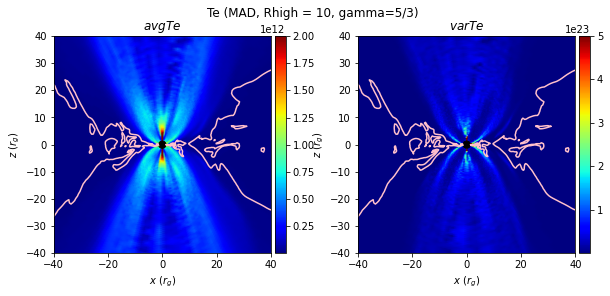

In [21]:
w = (-40,40,-40,40)
fig, axes = plt.subplots(1,2, figsize=(10,4))
pplt.plot_xz(axes[0], dumps_rh10[str(i0)], 'avgTe', window=w, vmin=10**7, vmax=2.*10**12)
pplt.plot_xz(axes[1], dumps_rh10[str(i0)], 'varTe', window=w, vmin=10**17, vmax=5.*10**23)
pplt.overlay_contours(axes[0], dumps_rh10[str(i0)], 'beta',(1.0,), color='pink')
pplt.overlay_contours(axes[1], dumps_rh10[str(i0)], 'beta',(1.0,), color='pink')
plt.suptitle('Te (MAD, Rhigh = 10, gamma=5/3)')
plt.show()

In [22]:
MI(dumps_rh10, i0)

In [23]:
get_statistics(dumps_rh10, 'MI')

statistics on MI:
max MI:
3.702881e+00
percentile on avgTe [50%, 75%, 90%]:
[0.19608867 0.4529668  0.72195614]


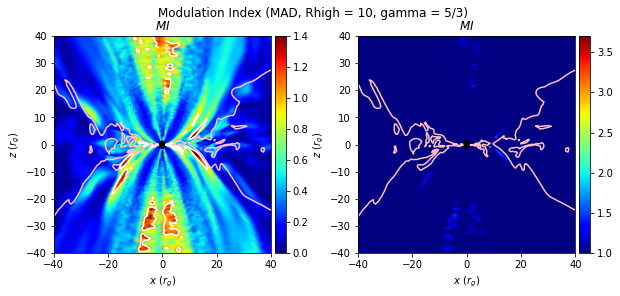

In [24]:
fig, axes = plt.subplots(1,2, figsize=(10,4))
pplt.plot_xz(axes[0], dumps_rh10[str(i0)], 'MI', window=w, vmin=0., vmax=1.4)
pplt.overlay_contours(axes[0], dumps_rh10[str(i0)], 'beta',(1.0,), color='pink')
pplt.overlay_contours(axes[0], dumps_rh10[str(i0)], 'MI',[1.0,], color='white')
pplt.plot_xz(axes[1], dumps_rh10[str(i0)], 'MI', window=w, vmin=1., vmax=3.7)
pplt.overlay_contours(axes[1], dumps_rh10[str(i0)], 'beta',(1.0,), color='pink')
plt.suptitle('Modulation Index (MAD, Rhigh = 10, gamma = 5/3)')
plt.show()

In [19]:
# SANE, R_h = 10 (idx=1)
dumps_sa_rh10 = change_Rh(i0, i1, src_sa_10M, 1, 5/3)

finish reading in dumps
finish average calculation.
finish variance calculation's loop


In [20]:
get_statistics(dumps_sa_rh10, 'avgTe')
print()
get_statistics(dumps_sa_rh10, 'varTe')

statistics on avgTe:
max avgTe:
1.757077e+12
percentile on avgTe [50%, 75%, 90%]:
[6.53734142e+09 3.61660862e+10 2.03998204e+11]

statistics on varTe:
max varTe:
4.777290e+23
percentile on avgTe [50%, 75%, 90%]:
[1.19373405e+17 2.68000896e+19 9.08473418e+21]


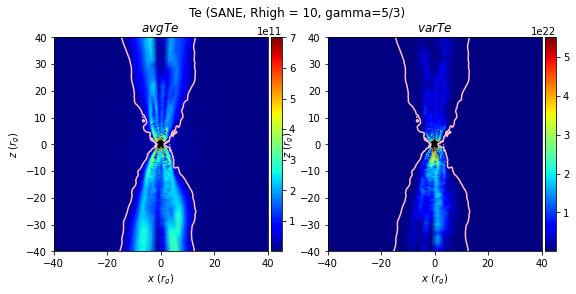

In [22]:
w = (-40,40,-40,40)
fig, axes = plt.subplots(1,2, figsize=(9,4))
# any dump obj in dumps array will give the same average value (avg for these dumps)
# dumps[str(i0)].cache.values = list(dumps[str(i0)].cache.values())[0]
pplt.plot_xz(axes[0], dumps_sa_rh10[str(i0)], 'avgTe', window=w, vmin=2*10**7, vmax=7.*10**11)
pplt.plot_xz(axes[1], dumps_sa_rh10[str(i0)], 'varTe', window=w, vmin=2*10**14, vmax=5.5*10**22)
pplt.overlay_contours(axes[0], dumps_sa_rh10[str(i0)], 'beta',(1.0,), color='pink')
pplt.overlay_contours(axes[1], dumps_sa_rh10[str(i0)], 'beta',(1.0,), color='pink')
plt.suptitle('Te (SANE, Rhigh = 10, gamma=5/3)')
plt.show()

In [23]:
MI(dumps_sa_rh10, i0)

In [24]:
get_statistics(dumps_sa_rh10, 'MI')

statistics on MI:
max MI:
2.559859e+00
percentile on avgTe [50%, 75%, 90%]:
[0.05092372 0.14270971 0.48720852]


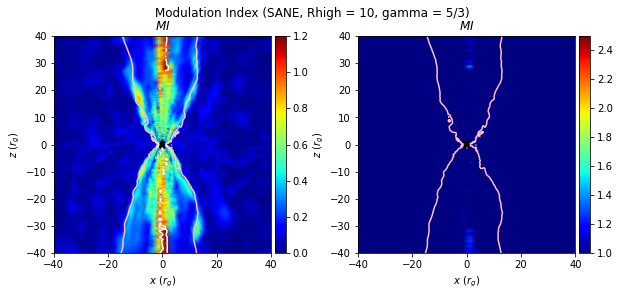

In [25]:
fig, axes = plt.subplots(1,2, figsize=(10,4))
pplt.plot_xz(axes[0], dumps_sa_rh10[str(i0)], 'MI', window=w, vmin=0., vmax=1.2)
pplt.overlay_contours(axes[0], dumps_sa_rh10[str(i0)], 'beta',(1.0,), color='pink')
pplt.overlay_contours(axes[0], dumps_sa_rh10[str(i0)], 'MI', [1.0,], color='white')
pplt.plot_xz(axes[1], dumps_sa_rh10[str(i0)], 'MI', window=w, vmin=1., vmax=2.5)
pplt.overlay_contours(axes[1], dumps_sa_rh10[str(i0)], 'beta',(1.0,), color='pink')
plt.suptitle('Modulation Index (SANE, Rhigh = 10, gamma = 5/3)')
plt.show()

In [18]:
# MAD, R_h = 40
dumps_rh40 = change_Rh(i0, i1, src_ma_10M, 2, 5/3)

finish reading in dumps
finish average calculation.
finish variance calculation's loop


In [20]:
get_statistics(dumps_rh40, 'avgTe')
print()
get_statistics(dumps_rh40, 'varTe')

statistics on avgTe:
max avgTe:
6.345925e+12
percentile on avgTe [50%, 75%, 90%]:
[1.17864593e+10 3.88356899e+11 7.96452537e+11]

statistics on varTe:
max varTe:
6.990450e+24
percentile on avgTe [50%, 75%, 90%]:
[2.18336834e+19 2.35381308e+22 9.55319244e+22]


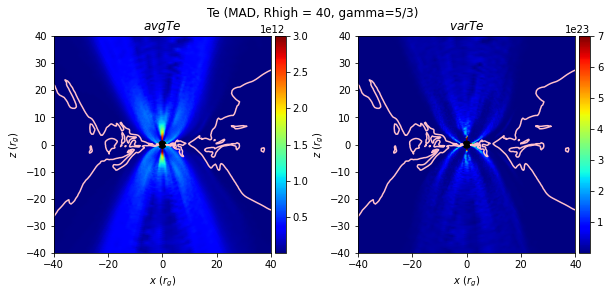

In [23]:
w = (-40,40,-40,40)
fig, axes = plt.subplots(1,2, figsize=(10,4))
pplt.plot_xz(axes[0], dumps_rh40[str(i0)], 'avgTe', window=w, vmin=10**7, vmax=3.*10**12)
pplt.plot_xz(axes[1], dumps_rh40[str(i0)], 'varTe', window=w, vmin=2*10**17, vmax=7.*10**23)
pplt.overlay_contours(axes[0], dumps_rh40[str(i0)], 'beta',(1.0,), color='pink')
pplt.overlay_contours(axes[1], dumps_rh40[str(i0)], 'beta',(1.0,), color='pink')
plt.suptitle('Te (MAD, Rhigh = 40, gamma=5/3)')
plt.show()

In [24]:
MI(dumps_rh40, i0)

In [25]:
get_statistics(dumps_rh40, 'MI')

statistics on MI:
max MI:
4.113777e+00
percentile on avgTe [50%, 75%, 90%]:
[0.21226126 0.53600143 0.88460213]


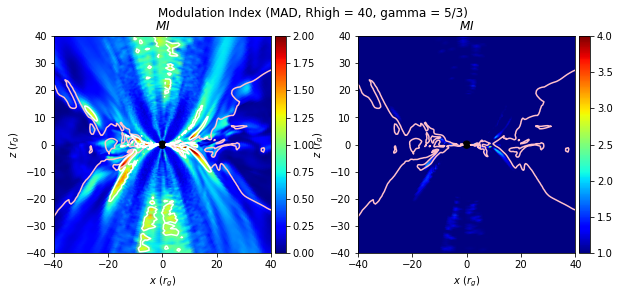

In [28]:
fig, axes = plt.subplots(1,2, figsize=(10,4))
pplt.plot_xz(axes[0], dumps_rh40[str(i0)], 'MI', window=w, vmin=0., vmax=2.)
pplt.overlay_contours(axes[0], dumps_rh40[str(i0)], 'beta',(1.0,), color='pink')
pplt.overlay_contours(axes[0], dumps_rh40[str(i0)], 'MI', [1.0,], color='white')
pplt.plot_xz(axes[1], dumps_rh40[str(i0)], 'MI', window=w, vmin=1., vmax=4.)
pplt.overlay_contours(axes[1], dumps_rh40[str(i0)], 'beta',(1.0,), color='pink')
plt.suptitle('Modulation Index (MAD, Rhigh = 40, gamma = 5/3)')
plt.show()

In [18]:
# SANE, R_h = 40 (idx=2)
dumps_sa_rh40 = change_Rh(i0, i1, src_sa_10M, 2, 5/3)

finish reading in dumps
finish average calculation.
finish variance calculation's loop


In [19]:
get_statistics(dumps_sa_rh40, 'avgTe')
print()
get_statistics(dumps_sa_rh40, 'varTe')

statistics on avgTe:
max avgTe:
1.669999e+12
percentile on avgTe [50%, 75%, 90%]:
[1.77274033e+09 1.11309272e+10 1.94387510e+11]

statistics on varTe:
max varTe:
4.497144e+23
percentile on avgTe [50%, 75%, 90%]:
[9.13697137e+15 4.95058303e+18 8.90793790e+21]


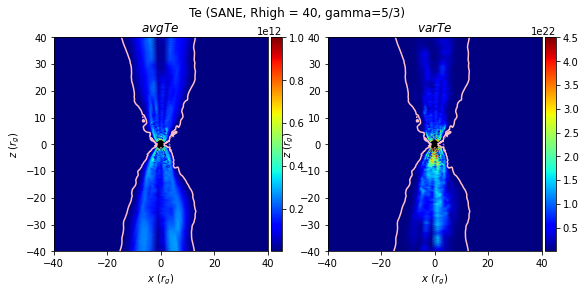

In [20]:
w = (-40,40,-40,40)
fig, axes = plt.subplots(1,2, figsize=(9,4))
pplt.plot_xz(axes[0], dumps_sa_rh40[str(i0)], 'avgTe', window=w, vmin=2*10**7, vmax=1.*10**12)
pplt.plot_xz(axes[1], dumps_sa_rh40[str(i0)], 'varTe', window=w, vmin=9*10**13, vmax=4.5*10**22)
pplt.overlay_contours(axes[0], dumps_sa_rh40[str(i0)], 'beta',(1.0,), color='pink')
pplt.overlay_contours(axes[1], dumps_sa_rh40[str(i0)], 'beta',(1.0,), color='pink')
plt.suptitle('Te (SANE, Rhigh = 40, gamma=5/3)')
plt.show()

In [21]:
MI(dumps_sa_rh40, i0)

In [22]:
get_statistics(dumps_sa_rh40, 'MI')

statistics on MI:
max MI:
3.938485e+00
percentile on avgTe [50%, 75%, 90%]:
[0.0522614  0.16515261 0.60416189]


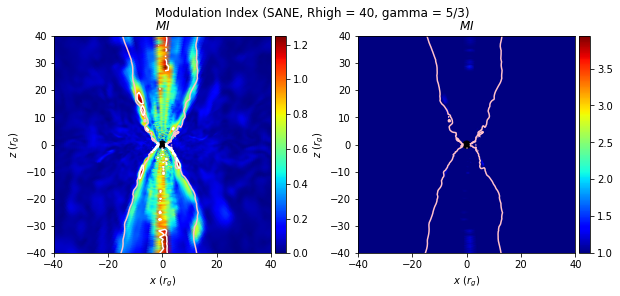

In [24]:
fig, axes = plt.subplots(1,2, figsize=(10,4))
pplt.plot_xz(axes[0], dumps_sa_rh40[str(i0)], 'MI', window=w, vmin=0., vmax=1.25)
pplt.overlay_contours(axes[0], dumps_sa_rh40[str(i0)], 'beta',(1.0,), color='pink')
pplt.overlay_contours(axes[0], dumps_sa_rh40[str(i0)], 'MI', [1.0,], color='white')
pplt.plot_xz(axes[1], dumps_sa_rh40[str(i0)], 'MI', window=w, vmin=1., vmax=3.94)
pplt.overlay_contours(axes[1], dumps_sa_rh40[str(i0)], 'beta',(1.0,), color='pink')
plt.suptitle('Modulation Index (SANE, Rhigh = 40, gamma = 5/3)')
plt.show()

In [18]:
# MAD, R_h = 160
dumps_rh160 = change_Rh(i0, i1, src_ma_10M, 3, 5/3)

finish reading in dumps
finish average calculation.
finish variance calculation's loop


In [19]:
get_statistics(dumps_rh160, 'avgTe')
print()
get_statistics(dumps_rh160, 'varTe')

statistics on avgTe:
max avgTe:
5.943968e+12
percentile on avgTe [50%, 75%, 90%]:
[3.92823030e+09 3.67333513e+11 7.81460734e+11]

statistics on varTe:
max varTe:
5.136147e+24
percentile on avgTe [50%, 75%, 90%]:
[3.80798753e+18 2.24040764e+22 9.45249906e+22]


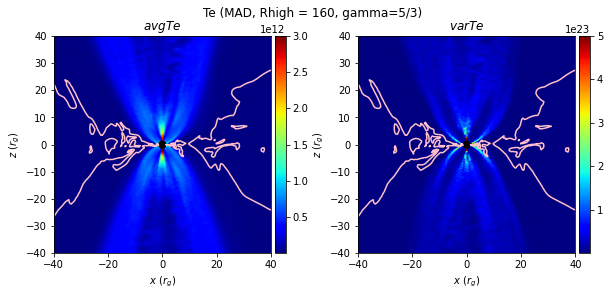

In [20]:
w = (-40,40,-40,40)
fig, axes = plt.subplots(1,2, figsize=(10,4))
pplt.plot_xz(axes[0], dumps_rh160[str(i0)], 'avgTe', window=w, vmin=4*10**7, vmax=3.*10**12)
pplt.plot_xz(axes[1], dumps_rh160[str(i0)], 'varTe', window=w, vmin=3.8*10**16, vmax=5.*10**23)
pplt.overlay_contours(axes[0], dumps_rh160[str(i0)], 'beta',(1.0,), color='pink')
pplt.overlay_contours(axes[1], dumps_rh160[str(i0)], 'beta',(1.0,), color='pink')
plt.suptitle('Te (MAD, Rhigh = 160, gamma=5/3)')
plt.show()

In [21]:
MI(dumps_rh160, i0)

In [22]:
get_statistics(dumps_rh160, 'MI')

statistics on MI:
max MI:
4.978942e+00
percentile on avgTe [50%, 75%, 90%]:
[0.22145145 0.59192099 1.07320664]


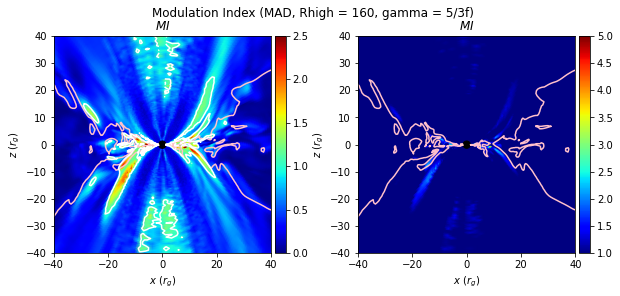

In [24]:
fig, axes = plt.subplots(1,2, figsize=(10,4))
pplt.plot_xz(axes[0], dumps_rh160[str(i0)], 'MI', window=w, vmin=0., vmax=2.5)
pplt.overlay_contours(axes[0], dumps_rh160[str(i0)], 'beta',(1.0,), color='pink')
pplt.overlay_contours(axes[0], dumps_rh160[str(i0)], 'MI', [1.0,], color='white')
pplt.plot_xz(axes[1], dumps_rh160[str(i0)], 'MI', window=w, vmin=1., vmax=5.)
pplt.overlay_contours(axes[1], dumps_rh160[str(i0)], 'beta',(1.0,), color='pink')
plt.suptitle('Modulation Index (MAD, Rhigh = 160, gamma = 5/3f)')
plt.show()

In [18]:
# SANE, R_h = 160 (idx=3)
dumps_sa_rh160 = change_Rh(i0, i1, src_sa_10M, 3, 5/3)

finish reading in dumps
finish average calculation.
finish variance calculation's loop


In [19]:
get_statistics(dumps_sa_rh160, 'avgTe')
print()
get_statistics(dumps_sa_rh160, 'varTe')

statistics on avgTe:
max avgTe:
1.614284e+12
percentile on avgTe [50%, 75%, 90%]:
[4.52873169e+08 2.99890321e+09 1.78860193e+11]

statistics on varTe:
max varTe:
3.711736e+23
percentile on avgTe [50%, 75%, 90%]:
[6.02112463e+14 6.00887618e+17 8.29856772e+21]


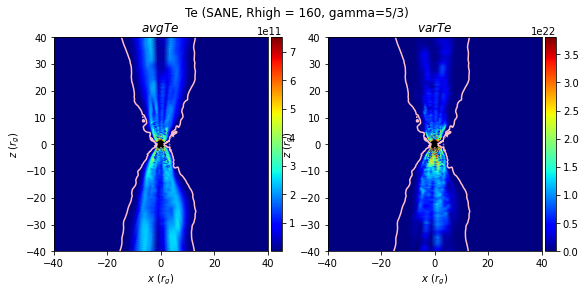

In [20]:
w = (-40,40,-40,40)
fig, axes = plt.subplots(1,2, figsize=(9,4))
pplt.plot_xz(axes[0], dumps_sa_rh160[str(i0)], 'avgTe', window=w, vmin=2*10**6, vmax=7.5*10**11)
pplt.plot_xz(axes[1], dumps_sa_rh160[str(i0)], 'varTe', window=w, vmin=2*10**12, vmax=3.8*10**22)
pplt.overlay_contours(axes[0], dumps_sa_rh160[str(i0)], 'beta',(1.0,), color='pink')
pplt.overlay_contours(axes[1], dumps_sa_rh160[str(i0)], 'beta',(1.0,), color='pink')
plt.suptitle('Te (SANE, Rhigh = 160, gamma=5/3)')
plt.show()

In [21]:
MI(dumps_sa_rh160, i0)

In [22]:
get_statistics(dumps_sa_rh160, 'MI')

statistics on MI:
max MI:
4.746599e+00
percentile on avgTe [50%, 75%, 90%]:
[0.05326731 0.17786608 0.68335797]


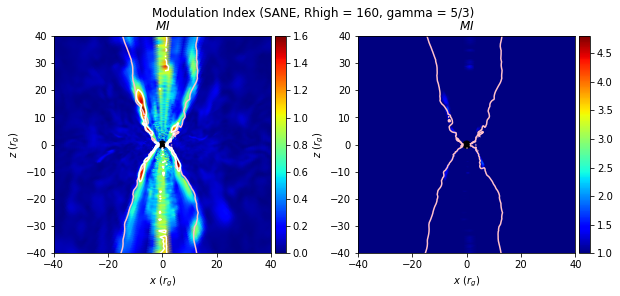

In [23]:
fig, axes = plt.subplots(1,2, figsize=(10,4))
pplt.plot_xz(axes[0], dumps_sa_rh160[str(i0)], 'MI', window=w, vmin=0., vmax=1.6)
pplt.overlay_contours(axes[0], dumps_sa_rh160[str(i0)], 'beta',(1.0,), color='pink')
pplt.overlay_contours(axes[0], dumps_sa_rh160[str(i0)], 'MI', [1.0,], color='white')
pplt.plot_xz(axes[1], dumps_sa_rh160[str(i0)], 'MI', window=w, vmin=1., vmax=4.8)
pplt.overlay_contours(axes[1], dumps_sa_rh160[str(i0)], 'beta',(1.0,), color='pink')
plt.suptitle('Modulation Index (SANE, Rhigh = 160, gamma = 5/3)')
plt.show()

## $\gamma = \frac{13}{9}$

In [18]:
# MAD, R_h = 1
dumps_rh1 = change_Rh(i0, i1, src_ma_10M, 0, 13/9)

finish reading in dumps
finish average calculation.
finish variance calculation's loop


In [ ]:
get_statistics(dumps_rh1, 'avgTe')
print()
get_statistics(dumps_rh1, 'varTe')

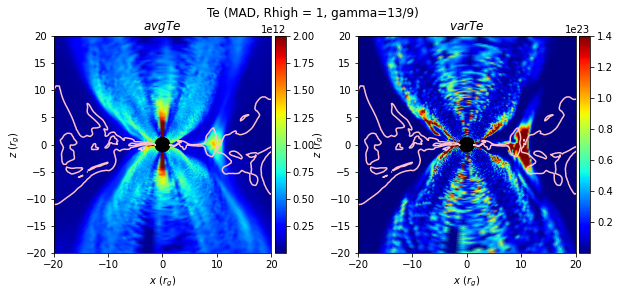

In [23]:
w = (-40,40,-40,40)
fig, axes = plt.subplots(1,2, figsize=(10,4))
pplt.plot_xz(axes[0], dumps_rh1[str(i0)], 'avgTe', window=w, vmin=10**7, vmax=2.*10**12)
pplt.plot_xz(axes[1], dumps_rh1[str(i0)], 'varTe', window=w, vmin=8*10**13, vmax=1.4*10**23)
pplt.overlay_contours(axes[0], dumps_rh1[str(i0)], 'beta',(1.0,), color='pink')
pplt.overlay_contours(axes[1], dumps_rh1[str(i0)], 'beta',(1.0,), color='pink')
plt.suptitle('Te (MAD, Rhigh = 1, gamma=13/9)')
plt.show()

In [ ]:
MI(dumps_rh1, i0)

In [ ]:
get_statistics(dumps_rh1, 'MI')

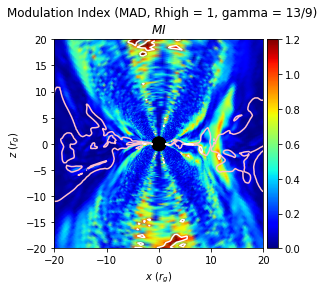

In [24]:
fig, axes = plt.subplots(1,2, figsize=(10,4))
pplt.plot_xz(axes[0], dumps_rh1[str(i0)], 'MI', window=w, vmin=0., vmax=1.2)
pplt.overlay_contours(axes[0], dumps_rh1[str(i0)], 'beta',(1.0,), color='pink')
pplt.overlay_contours(axes[0], dumps_rh1[str(i0)], 'MI',[1.0,], color='white')
pplt.plot_xz(axes[1], dumps_rh1[str(i0)], 'MI', window=w, vmin=0., vmax=1.2)
pplt.overlay_contours(axes[1], dumps_rh1[str(i0)], 'beta',(1.0,), color='pink')
plt.suptitle('Modulation Index (MAD, Rhigh = 1, gamma = 13/9)')
plt.show()

In [17]:
# SANE, R_h = 1 (idx=0)
dumps_sa_rh1 = change_Rh(i0, i1, src_sa_10M, 0, 13/9)

finish reading in dumps
i: 5000
i: 5001
i: 5002
i: 5003
i: 5004
5000
5001
5002
5003
5004


In [ ]:
get_statistics(dumps_sa_rh1, 'avgTe')
print()
get_statistics(dumps_sa_rh1, 'varTe')

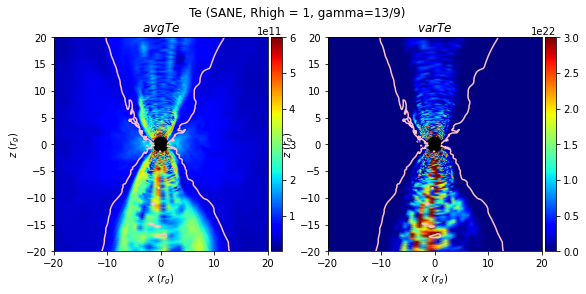

In [20]:
w = (-40,40,-40,40)
fig, axes = plt.subplots(1,2, figsize=(9,4))
# any dump obj in dumps array will give the same average value (avg for these dumps)
# dumps[str(i0)].cache.values = list(dumps[str(i0)].cache.values())[0]
pplt.plot_xz(axes[0], dumps_sa_rh1[str(i0)], 'avgTe', window=w, vmin=2*10**6, vmax=6.*10**11)
pplt.plot_xz(axes[1], dumps_sa_rh1[str(i0)], 'varTe', window=w, vmin=2.5*10**12, vmax=3.*10**22)
pplt.overlay_contours(axes[0], dumps_sa_rh1[str(i0)], 'beta',(1.0,), color='pink')
pplt.overlay_contours(axes[1], dumps_sa_rh1[str(i0)], 'beta',(1.0,), color='pink')
plt.suptitle('Te (SANE, Rhigh = 1, gamma=13/9)')
plt.show()

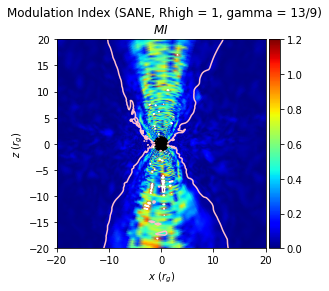

In [21]:
MI(dumps_sa_rh1, i0)
fig, ax = plt.subplots(1,1, figsize=(4,4))
pplt.plot_xz(ax, dumps_sa_rh1[str(i0)], 'MI', window=w, vmin=0., vmax=1.2)
pplt.overlay_contours(ax, dumps_sa_rh1[str(i0)], 'beta',(1.0,), color='pink')
pplt.overlay_contours(ax, dumps_sa_rh1[str(i0)], 'MI', [1.0,], color='white')
plt.suptitle('Modulation Index (SANE, Rhigh = 1, gamma = 13/9)')
plt.show()

In [17]:
# MAD, R_h = 10
dumps_rh10 = change_Rh(i0, i1, src_ma_10M, 1, 13/9)

finish reading in dumps
i: 5000
i: 5001
i: 5002
i: 5003
i: 5004
5000
5001
5002
5003
5004


In [ ]:
get_statistics(dumps_rh10, 'avgTe')
print()
get_statistics(dumps_rh10, 'varTe')

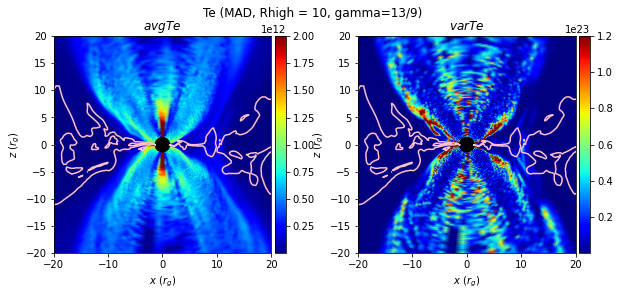

In [21]:
w = (-40,40,-40,40)
fig, axes = plt.subplots(1,2, figsize=(10,4))
pplt.plot_xz(axes[0], dumps_rh10[str(i0)], 'avgTe', window=w, vmin=10**7, vmax=2.*10**12)
pplt.plot_xz(axes[1], dumps_rh10[str(i0)], 'varTe', window=w, vmin=1.2*10**13, vmax=1.2*10**23)
pplt.overlay_contours(axes[0], dumps_rh10[str(i0)], 'beta',(1.0,), color='pink')
pplt.overlay_contours(axes[1], dumps_rh10[str(i0)], 'beta',(1.0,), color='pink')
plt.suptitle('Te (MAD, Rhigh = 10, gamma=13/9)')
plt.show()

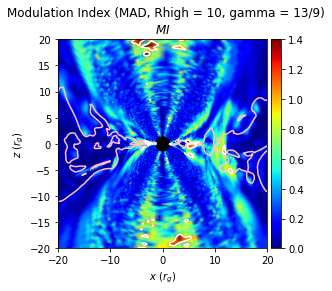

In [22]:
MI(dumps_rh10, i0)
fig, ax = plt.subplots(1,1, figsize=(4,4))
pplt.plot_xz(ax, dumps_rh10[str(i0)], 'MI', window=w, vmin=0., vmax=1.4)
pplt.overlay_contours(ax, dumps_rh10[str(i0)], 'beta',(1.0,), color='pink')
pplt.overlay_contours(ax, dumps_rh10[str(i0)], 'MI', [1.0,], color='white')
plt.suptitle('Modulation Index (MAD, Rhigh = 10, gamma = 13/9)')
plt.show()

In [17]:
# SANE, R_h = 10 (idx=1)
dumps_sa_rh10 = change_Rh(i0, i1, src_sa_10M, 1, 13/9)

finish reading in dumps
i: 5000
i: 5001
i: 5002
i: 5003
i: 5004
5000
5001
5002
5003
5004


In [ ]:
get_statistics(dumps_sa_rh10, 'avgTe')
print()
get_statistics(dumps_sa_rh10, 'varTe')

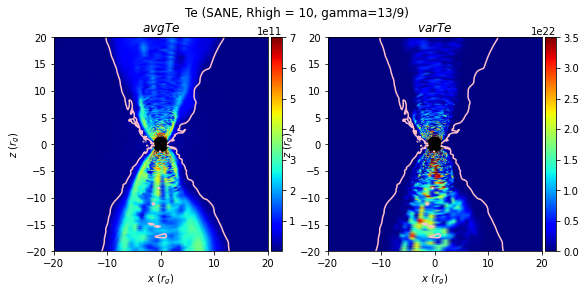

In [20]:
w = (-40,40,-40,40)
fig, axes = plt.subplots(1,2, figsize=(9,4))
# any dump obj in dumps array will give the same average value (avg for these dumps)
# dumps[str(i0)].cache.values = list(dumps[str(i0)].cache.values())[0]
pplt.plot_xz(axes[0], dumps_sa_rh10[str(i0)], 'avgTe', window=w, vmin=2*10**6, vmax=7.*10**11)
pplt.plot_xz(axes[1], dumps_sa_rh10[str(i0)], 'varTe', window=w, vmin=2.5*10**12, vmax=3.5*10**22)
pplt.overlay_contours(axes[0], dumps_sa_rh10[str(i0)], 'beta',(1.0,), color='pink')
pplt.overlay_contours(axes[1], dumps_sa_rh10[str(i0)], 'beta',(1.0,), color='pink')
plt.suptitle('Te (SANE, Rhigh = 10, gamma=13/9)')
plt.show()

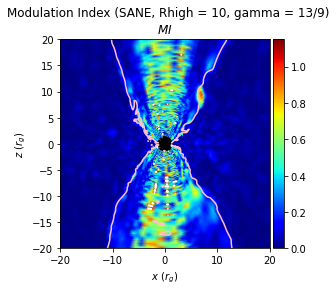

In [22]:
MI(dumps_sa_rh10, i0)
fig, ax = plt.subplots(1,1, figsize=(4,4))
pplt.plot_xz(ax, dumps_sa_rh10[str(i0)], 'MI', window=w, vmin=0., vmax=1.15)
pplt.overlay_contours(ax, dumps_sa_rh10[str(i0)], 'beta',(1.0,), color='pink')
pplt.overlay_contours(ax, dumps_sa_rh10[str(i0)], 'MI', [1.0,], color='white')
plt.suptitle('Modulation Index (SANE, Rhigh = 10, gamma = 13/9)')
plt.show()

In [17]:
# MAD, R_h = 40
dumps_rh40 = change_Rh(i0, i1, src_ma_10M, 2, 13/9)

finish reading in dumps
i: 5000
i: 5001
i: 5002
i: 5003
i: 5004
5000
5001
5002
5003
5004


In [ ]:
get_statistics(dumps_rh40, 'avgTe')
print()
get_statistics(dumps_rh40, 'varTe')

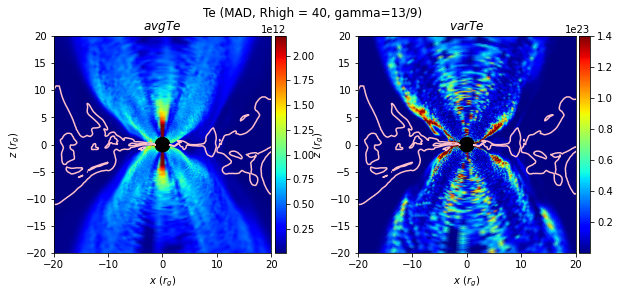

In [20]:
w = (-40,40,-40,40)
fig, axes = plt.subplots(1,2, figsize=(10,4))
pplt.plot_xz(axes[0], dumps_rh40[str(i0)], 'avgTe', window=w, vmin=10**7, vmax=2.2*10**12)
pplt.plot_xz(axes[1], dumps_rh40[str(i0)], 'varTe', window=w, vmin=1.4*10**13, vmax=1.4*10**23)
pplt.overlay_contours(axes[0], dumps_rh40[str(i0)], 'beta',(1.0,), color='pink')
pplt.overlay_contours(axes[1], dumps_rh40[str(i0)], 'beta',(1.0,), color='pink')
plt.suptitle('Te (MAD, Rhigh = 40, gamma=13/9)')
plt.show()

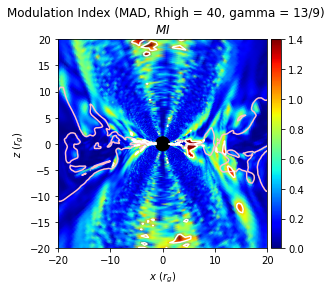

In [21]:
MI(dumps_rh40, i0)
fig, ax = plt.subplots(1,1, figsize=(4,4))
pplt.plot_xz(ax, dumps_rh40[str(i0)], 'MI', window=w, vmin=0., vmax=1.4)
pplt.overlay_contours(ax, dumps_rh40[str(i0)], 'beta',(1.0,), color='pink')
pplt.overlay_contours(ax, dumps_rh40[str(i0)], 'MI',[1.0,], color='white')
plt.suptitle('Modulation Index (MAD, Rhigh = 40, gamma = 13/9)')
plt.show()

In [17]:
# SANE, R_h = 40 (idx=2)
dumps_sa_rh40 = change_Rh(i0, i1, src_sa_10M, 2, 13/9)

finish reading in dumps
i: 5000
i: 5001
i: 5002
i: 5003
i: 5004
5000
5001
5002
5003
5004


In [ ]:
get_statistics(dumps_sa_rh40, 'avgTe')
print()
get_statistics(dumps_sa_rh40, 'varTe')

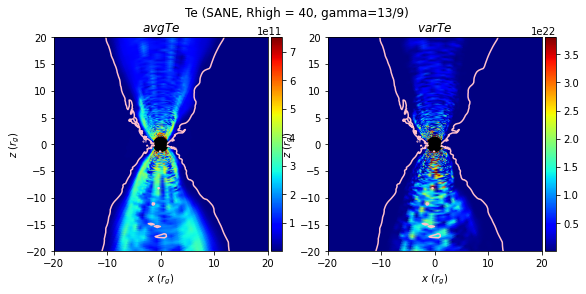

In [23]:
w = (-40,40,-40,40)
fig, axes = plt.subplots(1,2, figsize=(9,4))
pplt.plot_xz(axes[0], dumps_sa_rh40[str(i0)], 'avgTe', window=w, vmin=2*10**6, vmax=7.5*10**11)
pplt.plot_xz(axes[1], dumps_sa_rh40[str(i0)], 'varTe', window=w, vmin=4.*10**12, vmax=3.8*10**22)
pplt.overlay_contours(axes[0], dumps_sa_rh40[str(i0)], 'beta',(1.0,), color='pink')
pplt.overlay_contours(axes[1], dumps_sa_rh40[str(i0)], 'beta',(1.0,), color='pink')
plt.suptitle('Te (SANE, Rhigh = 40, gamma=13/9)')
plt.show()

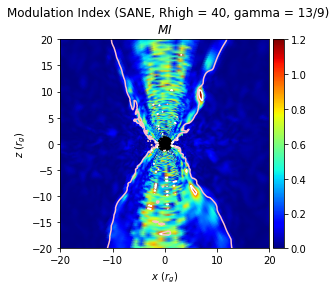

In [25]:
MI(dumps_sa_rh40, i0)
fig, ax = plt.subplots(1,1, figsize=(4,4))
pplt.plot_xz(ax, dumps_sa_rh40[str(i0)], 'MI', window=w, vmin=0., vmax=1.2)
pplt.overlay_contours(ax, dumps_sa_rh40[str(i0)], 'beta',(1.0,), color='pink')
pplt.overlay_contours(ax, dumps_sa_rh40[str(i0)], 'MI', [1.0,], color='white')
plt.suptitle('Modulation Index (SANE, Rhigh = 40, gamma = 13/9)')
plt.show()

In [17]:
# MAD, R_h = 160
dumps_rh160 = change_Rh(i0, i1, src_ma_10M, 3, 13/9)

finish reading in dumps
i: 5000
i: 5001
i: 5002
i: 5003
i: 5004
5000
5001
5002
5003
5004


In [ ]:
get_statistics(dumps_rh160, 'avgTe')
print()
get_statistics(dumps_rh160, 'varTe')

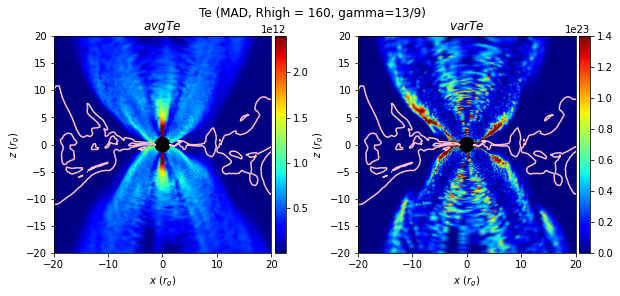

In [20]:
w = (-40,40,-40,40)
fig, axes = plt.subplots(1,2, figsize=(10,4))
pplt.plot_xz(axes[0], dumps_rh160[str(i0)], 'avgTe', window=w, vmin=10**7, vmax=2.4*10**12)
pplt.plot_xz(axes[1], dumps_rh160[str(i0)], 'varTe', window=w, vmin=8*10**12, vmax=1.4*10**23)
pplt.overlay_contours(axes[0], dumps_rh160[str(i0)], 'beta',(1.0,), color='pink')
pplt.overlay_contours(axes[1], dumps_rh160[str(i0)], 'beta',(1.0,), color='pink')
plt.suptitle('Te (MAD, Rhigh = 160, gamma=13/9)')
plt.show()

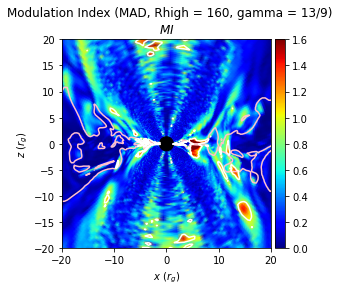

In [21]:
MI(dumps_rh160, i0)
fig, ax = plt.subplots(1,1, figsize=(4,4))
pplt.plot_xz(ax, dumps_rh160[str(i0)], 'MI', window=w, vmin=0., vmax=1.6)
pplt.overlay_contours(ax, dumps_rh160[str(i0)], 'beta',(1.0,), color='pink')
pplt.overlay_contours(ax, dumps_rh160[str(i0)], 'MI', [1.0,], color='white')
plt.suptitle('Modulation Index (MAD, Rhigh = 160, gamma = 13/9)')
plt.show()

In [19]:
# SANE, R_h = 160 (idx=3)
dumps_sa_rh160 = change_Rh(i0, i1, src_sa_10M, 3, 13/9)

finish reading in dumps
i: 5000
i: 5001
i: 5002
i: 5003
i: 5004
5000
5001
5002
5003
5004


In [ ]:
get_statistics(dumps_sa_rh160, 'avgTe')
print()
get_statistics(dumps_sa_rh160, 'varTe')

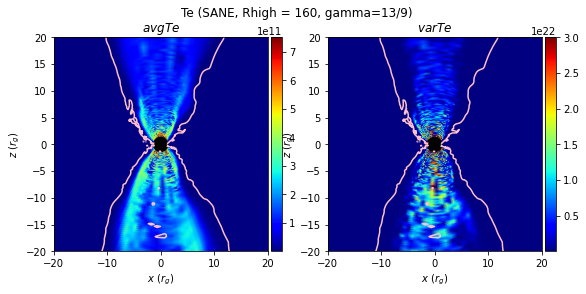

In [22]:
w = (-40,40,-40,40)
fig, axes = plt.subplots(1,2, figsize=(9,4))
pplt.plot_xz(axes[0], dumps_sa_rh160[str(i0)], 'avgTe', window=w, vmin=2*10**6, vmax=7.5*10**11)
pplt.plot_xz(axes[1], dumps_sa_rh160[str(i0)], 'varTe', window=w, vmin=4*10**12, vmax=3.*10**22)
pplt.overlay_contours(axes[0], dumps_sa_rh160[str(i0)], 'beta',(1.0,), color='pink')
pplt.overlay_contours(axes[1], dumps_sa_rh160[str(i0)], 'beta',(1.0,), color='pink')
plt.suptitle('Te (SANE, Rhigh = 160, gamma=13/9)')
plt.show()

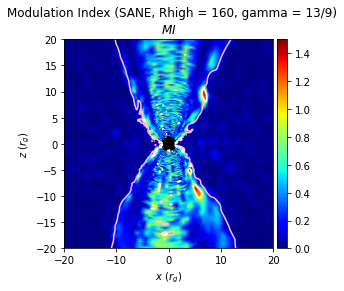

In [25]:
MI(dumps_sa_rh160, i0)
fig, ax = plt.subplots(1,1, figsize=(4,4))
pplt.plot_xz(ax, dumps_sa_rh160[str(i0)], 'MI', window=w, vmin=0., vmax=1.5)
pplt.overlay_contours(ax, dumps_sa_rh160[str(i0)], 'beta',(1.0,), color='pink')
pplt.overlay_contours(ax, dumps_sa_rh160[str(i0)], 'MI', [1.0,], color='white')
plt.suptitle('Modulation Index (SANE, Rhigh = 160, gamma = 13/9)')
plt.show()